## Nozomu Nakanishi
2020264 /
CA 2 - 26/05 - MsC Data Analytics

In [1]:
# Importing the libraries required for the analysis
import pandas as pd # data handling and visualization 
import numpy as np # for numerical operations
import seaborn as sns #visualisation
import matplotlib.pyplot as plt # visualization
from matplotlib import pyplot # Importing pyplot
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
# Stylesheet for matplotlib and seaborn
pd.set_option('display.max_columns', 200) # Show all columns from the Dataset.

import warnings # filter warnings
warnings.filterwarnings('ignore')

## Planning Permissions (All types and total of m2 of permissions granted)

The first dataset to be manipulated is related to the permissions in the state, with two variables included. First, the planning permissions granted for all types of construction, which can include new houses, extensions. And the second, is the total meter square which permissions were given. The representation of the data are in quarters starting from 1975 and ending at 2022.

In [2]:
df_plan_ie = pd.read_csv("BHQ03.20230507T100501.csv") # Imports the planning permissions dataset.
display(df_plan_ie) # Displays the dataset with the head, tail and shape.

Statistic Label Quarter  \
0                     Planning Permissions Granted  1975Q1   
1                     Planning Permissions Granted  1975Q2   
2                     Planning Permissions Granted  1975Q3   
3                     Planning Permissions Granted  1975Q4   
4                     Planning Permissions Granted  1976Q1   
..                                             ...     ...   
379  Total Floor Area for which Permission Granted  2021Q4   
380  Total Floor Area for which Permission Granted  2022Q1   
381  Total Floor Area for which Permission Granted  2022Q2   
382  Total Floor Area for which Permission Granted  2022Q3   
383  Total Floor Area for which Permission Granted  2022Q4   

          Type of Construction           UNIT   VALUE  
0    All types of construction         Number  4948.0  
1    All types of construction         Number  6056.0  
2    All types of construction         Number  6779.0  
3    All types of construction         Number  5998.0  
4    All types of construction         Number  5936.0  
..                         ...            ...     ...  
379  All types of construction  000 Sq Metres  2200.0  
380  All types of construction  000 Sq Metres  1897.0  
381  All types of construction  000 Sq Metres  1930.0  
382  All types of construction  000 Sq Metres  1724.0  
383  All types of construction  000 Sq Metres  1652.0  

[384 rows x 5 columns]

- After displaying the first dataset, named as df_plan_ie, it shows that is composed by 384 rows and 5 columns. The unit column presents the units which each variable is measured, the number of planning permissions are actually the total number of permissions given and the total floor is computed in thousands of meter square. 

In [3]:
# Giving a shorter label to the second column, too large for visualizations (labels).
df_plan_ie = df_plan_ie.rename(columns={'Total Floor Area for which Permission Granted': 'Permissions Granted in m2'})

- The name of the variables, especially the total floor, looks too long which might cause the figures to shrink (when set as label) and in order to mitigate this threat the rename funtion is going to be applied also adding the m2 to be easy to remember in what unit is measured.

In [4]:
df_plan_ie.isnull().sum() # Checking for missing values.

Statistic Label          0
Quarter                  0
Type of Construction     0
UNIT                     0
VALUE                   12
dtype: int64

In [5]:
df_plan_ie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Statistic Label       384 non-null    object 
 1   Quarter               384 non-null    object 
 2   Type of Construction  384 non-null    object 
 3   UNIT                  384 non-null    object 
 4   VALUE                 372 non-null    float64
dtypes: float64(1), object(4)
memory usage: 15.1+ KB


- The results after applying .info(), shows that the two variables in the dataset are numerical variables. However, despite having float as a type, they are discrete and not continuous. <b>REFERENCE THIS PART</b> According to the backgoung notes of the dataset, it says that the number of permissions are a whole number so as the permissions in m2, which were rounded by the CSO.

- There a columns that does not have meaning to analyse, such as type of construction and unit. Thus, the pivot function will be called to reshape the data which the time frame will be placed as index and the statistical label as columns and the designated values for each quarter. The function will aid in the creation of data visualization such as pairplots, in other words would be in a appropriate format for other visualizations. Also to start looking at the statistical features.

In [6]:
df_plan_ie = df_plan_ie.pivot(index="Quarter", columns="Statistic Label", values="VALUE") # Reshaping the dataset.
display(df_plan_ie) # Shows the result of the pivot funcion displaying the first five rows.

Statistic Label  Planning Permissions Granted  \
Quarter                                         
1975Q1                                 4948.0   
1975Q2                                 6056.0   
1975Q3                                 6779.0   
1975Q4                                 5998.0   
1976Q1                                 5936.0   
...                                       ...   
2021Q4                                 7222.0   
2022Q1                                 7742.0   
2022Q2                                 7058.0   
2022Q3                                 6743.0   
2022Q4                                 5691.0   

Statistic Label  Total Floor Area for which Permission Granted  
Quarter                                                         
1975Q1                                                   896.0  
1975Q2                                                  1188.0  
1975Q3                                                  1056.0  
1975Q4                                                   921.0  
1976Q1                                                  1028.0  
...                                                        ...  
2021Q4                                                  2200.0  
2022Q1                                                  1897.0  
2022Q2                                                  1930.0  
2022Q3                                                  1724.0  
2022Q4                                                  1652.0  

[192 rows x 2 columns]

- After applying the pivot function, the dataset presents a new shape with 192 observations with 2 variables. 

- The name of the variables, especially the total floor, looks too long which might cause the figures to shrink (when set as label) and in order to mitigate this threat the rename funtion is going to be applied also adding the m2 to be easy to remember in what unit is measured. 

In [7]:
# Giving a shorter label to the second column, too large for visualizations (labels).
df_plan_ie = df_plan_ie.rename(columns={'Total Floor Area for which Permission Granted': 'Permissions Granted in m2'})

- It was observed that the dataset have 12 missing values, but the cell below will find which observations are missing.

In [8]:
rows_with_missing_values = df_plan_ie[df_plan_ie.isna().any(axis=1)] # Locate rows with missing values.
print(rows_with_missing_values) # Display rows with missing values.

Statistic Label  Planning Permissions Granted  Permissions Granted in m2
Quarter                                                                 
1999Q1                                    NaN                        NaN
1999Q2                                    NaN                        NaN
1999Q3                                    NaN                        NaN
1999Q4                                    NaN                        NaN
2000Q1                                    NaN                        NaN
2000Q2                                    NaN                        NaN


In [9]:
df_plan_ie.index = pd.to_datetime(df_plan_ie.index)

In [10]:
from sklearn.impute import SimpleImputer

# Create a copy of the original dataset
df_imputed = df_plan_ie.copy()

# Specify the columns to impute
columns_to_impute = ['Planning Permissions Granted', 'Permissions Granted in m2']

# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Perform mean imputation on the specified columns
df_imputed[columns_to_impute] = imputer.fit_transform(df_imputed[columns_to_impute])

# Display the imputed values for the specified rows (1991Q1 to 2000Q2)
imputed_values = df_imputed.loc['1999Q1':'2000Q2', columns_to_impute]
print(imputed_values)

Statistic Label  Planning Permissions Granted  Permissions Granted in m2
Quarter                                                                 
1999-01-01                             7405.0                1984.741935
1999-04-01                             7405.0                1984.741935
1999-07-01                             7405.0                1984.741935
1999-10-01                             7405.0                1984.741935
2000-01-01                             7405.0                1984.741935
2000-04-01                             7405.0                1984.741935


In [11]:
# Select the range of rows from 1991Q1 to 2000Q2
selected_rows = df_imputed.loc['1999Q1':'2000Q2']

# Print the selected rows
print(selected_rows)


Statistic Label  Planning Permissions Granted  Permissions Granted in m2
Quarter                                                                 
1999-01-01                             7405.0                1984.741935
1999-04-01                             7405.0                1984.741935
1999-07-01                             7405.0                1984.741935
1999-10-01                             7405.0                1984.741935
2000-01-01                             7405.0                1984.741935
2000-04-01                             7405.0                1984.741935


- The df_plan_ie presents 6 missing values in each column, which are represented by NaN
- The missing data is from the first quarter of 1999 to the second quarter of 2000.

In [12]:
df_plan_ie.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 1975-01-01 to 2022-10-01
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Planning Permissions Granted  186 non-null    float64
 1   Permissions Granted in m2     186 non-null    float64
dtypes: float64(2)
memory usage: 8.6 KB


The results after applying .info(), shows that the two variables in the dataset are numerical variables. However, despite having float as a type, they are discrete and not continuous. <b>DO I HAVE TO REFERENCE THIS PART?</b> According to the backgoung notes of the dataset, it says that the number of permissions are a whole number so as the permissions in m2, which were rounded by the CSO.

In [13]:
df_plan_ie.describe() # Displays statistical features.

Statistic Label  Planning Permissions Granted  Permissions Granted in m2
count                              186.000000                 186.000000
mean                              7405.000000                1984.741935
std                               2769.372355                1340.867105
min                               3275.000000                 699.000000
25%                               5695.250000                1104.000000
50%                               6830.500000                1499.500000
75%                               8524.750000                2211.250000
max                              17338.000000                6719.000000

The second dataset to be handled is the house construction index based on January of 1991 (1991=100) in the state and its represented in %. <b> DATASET NOTES REFERENCE CSO website</b> According to the notes of the dataset the index monitors labour expenditure in the construction industry and also the cost of  materials to build.

In [14]:
df_cost_ie = pd.read_csv("HSM09.20230504T210557.csv") # Importing House Construction dataset. 
display(df_cost_ie) # Displays the dataset with the head, tail and shape.

STATISTIC Label    Month  State               UNIT  VALUE
0    House Construction Cost Index  1975M01  State  Base Jan 1991=100   18.3
1    House Construction Cost Index  1975M02  State  Base Jan 1991=100   18.7
2    House Construction Cost Index  1975M03  State  Base Jan 1991=100   18.8
3    House Construction Cost Index  1975M04  State  Base Jan 1991=100   19.6
4    House Construction Cost Index  1975M05  State  Base Jan 1991=100   19.8
..                             ...      ...    ...                ...    ...
508  House Construction Cost Index  2017M04  State  Base Jan 1991=100  210.7
509  House Construction Cost Index  2017M05  State  Base Jan 1991=100  211.1
510  House Construction Cost Index  2017M06  State  Base Jan 1991=100  211.2
511  House Construction Cost Index  2017M07  State  Base Jan 1991=100  211.4
512  House Construction Cost Index  2017M08  State  Base Jan 1991=100  211.4

[513 rows x 5 columns]

- After displaying the cost index dataset, named as df_cost_ie, shows that is composed by 513 lines and 5 features. The unit column presents the units which each variable is measured also mentioned in the description. While the time period of the first dataset was in quartes, the cost index have monthly periods.

- There a columns that does not have meaning to analyse, like the unit and state column.

In [15]:
df_cost_ie.isnull().sum() # Check for missing values.

STATISTIC Label    0
Month              0
State              0
UNIT               0
VALUE              0
dtype: int64

In [16]:
df_cost_ie.set_index('Month', inplace=True) # Sets the month column as the new index.

In [17]:
# Renaming for better understanding of the value.
df_cost_ie = df_cost_ie.rename(columns={'VALUE': 'House Construction Index (01/91) in %'})
df_cost_ie.head() # Prints the first five row to check the changes.

STATISTIC Label  State               UNIT  \
Month                                                              
1975M01  House Construction Cost Index  State  Base Jan 1991=100   
1975M02  House Construction Cost Index  State  Base Jan 1991=100   
1975M03  House Construction Cost Index  State  Base Jan 1991=100   
1975M04  House Construction Cost Index  State  Base Jan 1991=100   
1975M05  House Construction Cost Index  State  Base Jan 1991=100   

         House Construction Index (01/91) in %  
Month                                           
1975M01                                   18.3  
1975M02                                   18.7  
1975M03                                   18.8  
1975M04                                   19.6  
1975M05                                   19.8

- The replace method is being used because of an error when applying the code to change the index to datetime, stating that it has letter O instead of zero in one of the observations.

In [18]:
df_cost_ie.index = df_cost_ie.index.str.replace('O', '0') # Replaces the letter O for a 0.

- The reason that to_datetime is being called is that in a later stage the resample function is going to be applied, changing the time from months to quarters. Also, one of the objectives is to merge the cost index to the other datasets with quarters time period.

In [19]:
df_cost_ie.index = pd.to_datetime(df_cost_ie.index, format='%YM%m') # Change the type to datetime, with YYYY/MM format.
df_cost_ie.head() # Display the first five rows.

STATISTIC Label  State               UNIT  \
Month                                                                 
1975-01-01  House Construction Cost Index  State  Base Jan 1991=100   
1975-02-01  House Construction Cost Index  State  Base Jan 1991=100   
1975-03-01  House Construction Cost Index  State  Base Jan 1991=100   
1975-04-01  House Construction Cost Index  State  Base Jan 1991=100   
1975-05-01  House Construction Cost Index  State  Base Jan 1991=100   

            House Construction Index (01/91) in %  
Month                                              
1975-01-01                                   18.3  
1975-02-01                                   18.7  
1975-03-01                                   18.8  
1975-04-01                                   19.6  
1975-05-01                                   19.8

In [20]:
df_cost_ie.describe()

House Construction Index (01/91) in %
count                             513.000000
mean                              126.196491
std                                63.672084
min                                18.300000
25%                                78.800000
50%                               115.900000
75%                               198.800000
max                               211.400000

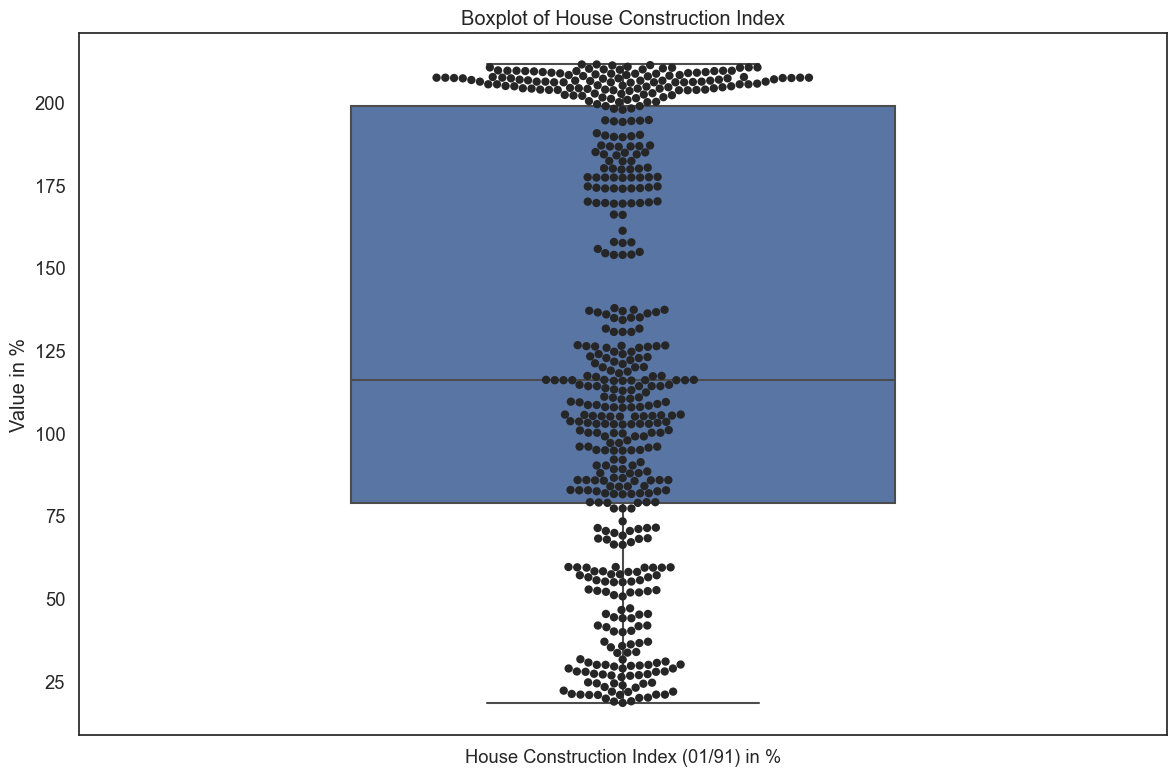

In [21]:
# Sets up the plot
sns.set(style='white', font_scale=1.2) # Adds white background and adjusting the font scale.
plt.figure(figsize=(12, 8)) # Sets the figure size.
# Creates the boxplot
ax = sns.boxplot(data=df_cost_ie[['House Construction Index (01/91) in %']], width=0.5)
ax.set_ylabel('Value in %') # Adds y-label.
ax.set_title('Boxplot of House Construction Index') # Adds a title for the figure.
# Adds all data points with swarmplot (dots). Also, the color black was chosen for the dots because of the easy identification.
sns.swarmplot(data=df_cost_ie[['House Construction Index (01/91) in %']], color='black', size=6)
plt.tight_layout() # Adjust the layout.
plt.show() # Shows the plot

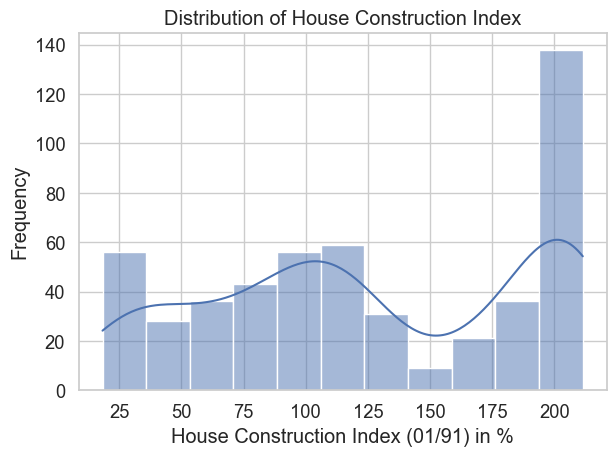

In [22]:
# Creates histogram to check the distribution of the construction index.
sns.set_style('whitegrid') # Sets a white style in the background.
sns.histplot(data=df_cost_ie, x='House Construction Index (01/91) in %', kde=True) # Creates the histogram, including KDE curve.
plt.xlabel('House Construction Index (01/91) in %') # Adds x-label.
plt.ylabel('Frequency') # Adds y-label.
plt.title('Distribution of House Construction Index') # Adds a title for the histogram.
plt.tight_layout() # Adjust layout.
plt.show() # Display the figure.

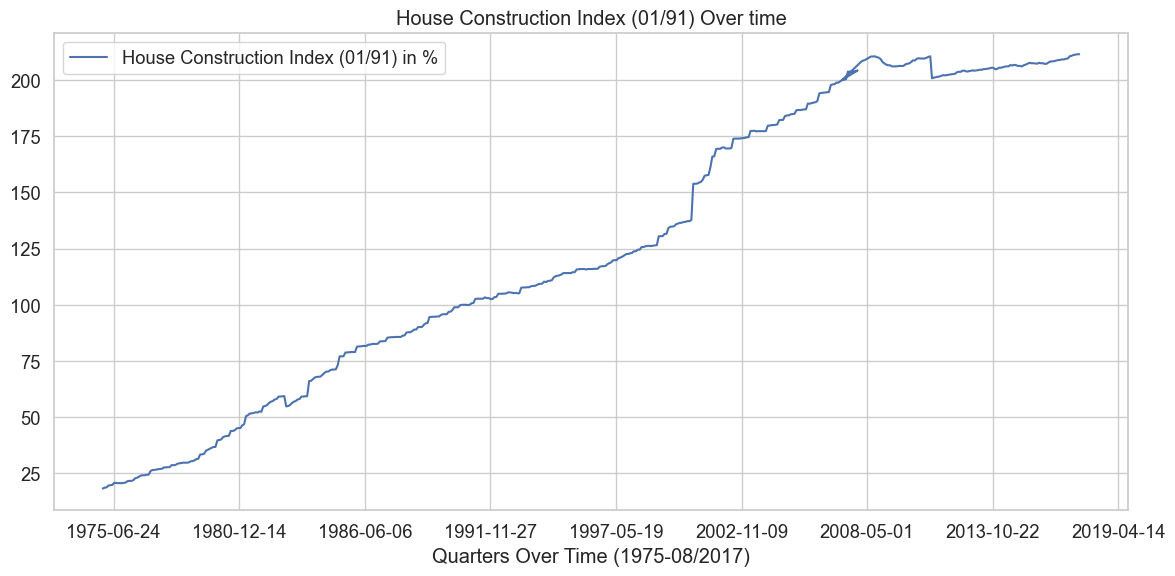

In [23]:
# Creates a lineplot for the house construction dataset with a whitegrid style set in the precious cell.
plt.figure(figsize=(12, 6)) # Sets the figure size.
plt.plot(df_cost_ie.index, df_cost_ie['House Construction Index (01/91) in %'], label='House Construction Index (01/91) in %')
plt.xlabel('Quarters Over Time (1975-08/2017)') # Sets x-label.
plt.title('House Construction Index (01/91) Over time') # Adds a title for the figure.
plt.legend() # Adds legend to the lineplot.

# Limiting the number of x-axis ticks to avoid overlap
max_ticks = 10  # Sets the maximum ticks in the x-axis, this case 10.
x_locator = ticker.MaxNLocator(max_ticks) # Creates a locator to set the position according to the number given, whis is ten.
plt.gca().xaxis.set_major_locator(x_locator)
plt.tight_layout() # Adjust the plot.
plt.show() # Display the lineplot.

## Reference this cell

Based on statistical nature of the data and ..............<b>REFERENCE</b>................, the use of standard practise for this situation would be appropriate. Using the .resample function to achieve the goal. But, also adjusting the time from month to quarters, matching others datasets.    

In [24]:
df_cost_ie = df_cost_ie['House Construction Index (01/91) in %'].resample('Q').mean() # Resampling the dataset from months(M) to quartes (Q).
df_cost_ie.head() # Display the first five rows.

Month
1975-03-31    18.600000
1975-06-30    19.766667
1975-09-30    20.766667
1975-12-31    20.733333
1976-03-31    21.433333
Freq: Q-DEC, Name: House Construction Index (01/91) in %, dtype: float64

In [25]:
# Changing the index column, now using quarters instead of the end of each three months (resulted from the resample operation).  
df_cost_ie.index = df_cost_ie.index.to_period('Q').strftime('%YQ%q')
df_cost_ie.head() # Display first five rows to check.

Month
1975Q1    18.600000
1975Q2    19.766667
1975Q3    20.766667
1975Q4    20.733333
1976Q1    21.433333
Name: House Construction Index (01/91) in %, dtype: float64

In [26]:
# Transforming back into a dataframe, because resampling the dataset returned a 1D array.
df_cost_ie = df_cost_ie.to_frame()
df_cost_ie.index.rename('Quarter', inplace = True) # Renames the index from Month to Quarter. 

## WHAT CHANGED AFTER THE RESAMPLE?

In [27]:
df_cost_ie.describe() # Displays statistical features.

House Construction Index (01/91) in %
count                             171.000000
mean                              126.218519
std                                63.822317
min                                18.600000
25%                                78.600000
50%                               115.933333
75%                               198.466667
max                               211.400000

## AVG prices of new houses

In [28]:
df_price_ie = pd.read_csv("HSQ06.20230504T210532.csv") # Imports the new house prices in Ireland dataset.
display(df_price_ie) # Display the head, tail and shape of the dataset.

Statistic Label Quarter         Area  UNIT   VALUE
0     New House Prices  1975Q1     National  Euro   11887
1     New House Prices  1975Q1       Dublin  Euro   11858
2     New House Prices  1975Q1         Cork  Euro   10667
3     New House Prices  1975Q1       Galway  Euro   13519
4     New House Prices  1975Q1     Limerick  Euro   12565
...                ...     ...          ...   ...     ...
1171  New House Prices  2016Q4         Cork  Euro  311849
1172  New House Prices  2016Q4       Galway  Euro  253270
1173  New House Prices  2016Q4     Limerick  Euro  233655
1174  New House Prices  2016Q4    Waterford  Euro  271158
1175  New House Prices  2016Q4  Other areas  Euro  277837

[1176 rows x 5 columns]

In [29]:
df_price_ie.isnull().sum()

Statistic Label    0
Quarter            0
Area               0
UNIT               0
VALUE              0
dtype: int64

The dataset have 1176 rows and 5 columns, including average new house prices for different locations and the national average. However, the way that the data is displayed is difficult to visualize and analyse. Therefore, the pivot function is going to be applied to give a new shape for the dataset, in which the time frame (quarte) will be placed as index and the area as columns and the designated values for each quarter and location.

The columns statistic label and unit in € will not be part of the analysis, thus leaving only the necessary columns.

In [30]:
# Reshaping the dataset, using aggfunct=first to take the first non-null value for the column(area) and index(quarter).
df_price_ie = df_price_ie.pivot_table(index="Quarter", columns="Area", values="VALUE", aggfunc='first')
display(df_price_ie) # Display the first five rows to check the results of the merge, but also its new shape.

Area       Cork  Dublin  Galway  Limerick  National  Other areas  Waterford
Quarter                                                                    
1975Q1    10667   11858   13519     12565     11887        11428      11090
1975Q2    12131   12804   14306     12714     12837        12956      12366
1975Q3    12567   13153   14248     13643     13269        13521      12526
1975Q4    14194   13835   15176     13337     13892        13812      13516
1976Q1    13829   14770   17086     14776     14738        14650      14066
...         ...     ...     ...       ...       ...          ...        ...
2015Q4   266279  387963  237350    227033    298551       269337     214044
2016Q1   273731  403843  269960    228740    309703       267673     211448
2016Q2   289658  401346  263167    253608    314950       273769     223652
2016Q3   292511  397644  263801    236318    304307       268874     229910
2016Q4   311849  391369  253270    233655    322680       277837     271158

[168 rows x 7 columns]

In [31]:
df_price_ie.info() # Checking the type of the variables. Also, provides the types.

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 1975Q1 to 2016Q4
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Cork         168 non-null    int64
 1   Dublin       168 non-null    int64
 2   Galway       168 non-null    int64
 3   Limerick     168 non-null    int64
 4   National     168 non-null    int64
 5   Other areas  168 non-null    int64
 6   Waterford    168 non-null    int64
dtypes: int64(7)
memory usage: 10.5+ KB


In [32]:
df_price_ie.describe() # Displays statistical features.

Area            Cork         Dublin         Galway       Limerick  \
count     168.000000     168.000000     168.000000     168.000000   
mean   132194.357143  167123.589286  129865.785714  121066.982143   
std    101413.965451  132385.481299   92348.818119   88414.388593   
min     10667.000000   11858.000000   13519.000000   12565.000000   
25%     42179.750000   49664.000000   47766.000000   45627.000000   
50%     80323.000000   89834.000000   88778.000000   77699.500000   
75%    234526.250000  288472.500000  222822.250000  209329.250000   
max    334160.000000  426900.000000  325147.000000  311956.000000   

Area        National    Other areas      Waterford  
count     168.000000     168.000000     168.000000  
mean   134943.982143  123779.434524  116595.535714  
std    100937.577713   91758.770190   86821.480852  
min     11887.000000   11428.000000   11090.000000  
25%     46578.000000   45065.500000   45436.750000  
50%     80937.000000   74643.500000   71775.000000  
75%    227914.750000  211308.500000  188988.250000  
max    331947.000000  306712.000000  305560.000000

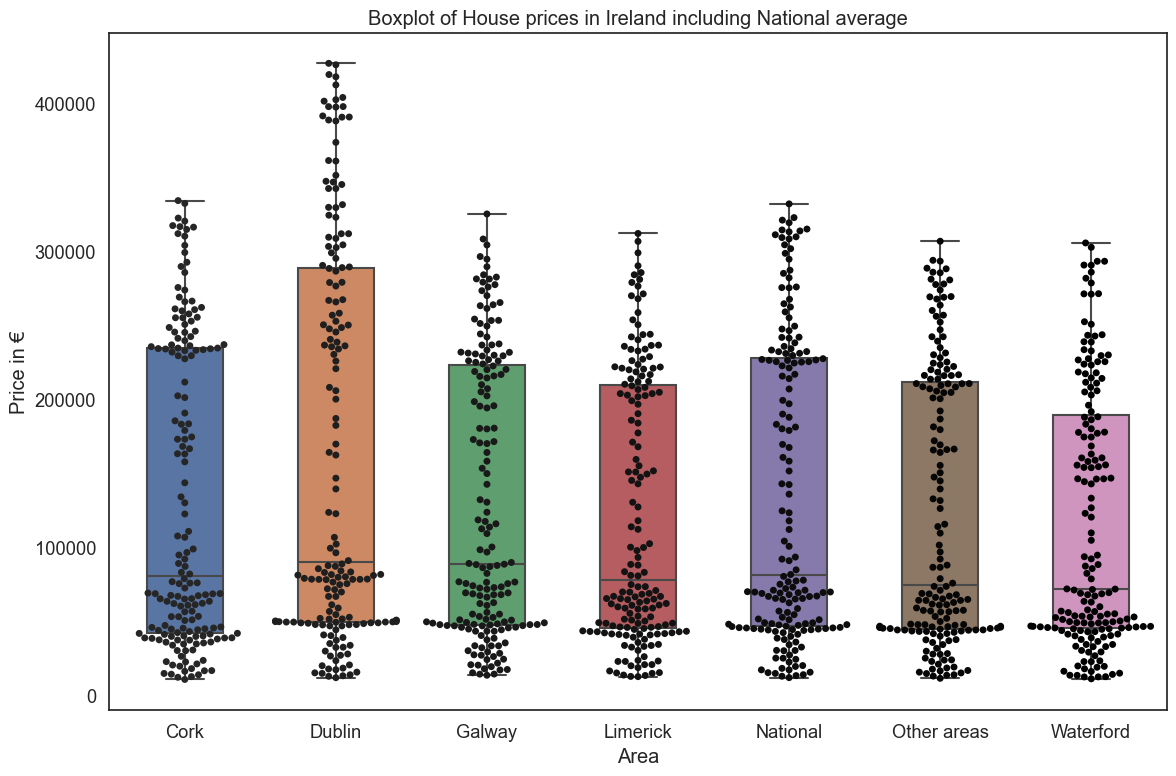

In [33]:
plt.figure(figsize=(12, 8)) # Sets the figure size with the boxplots.
sns.set(style="white", font_scale=1.2) # Adds white in the back of the plots and adjusts the font scale.

# Creates the boxplot for each of the locations
ax = sns.boxplot(data=df_price_ie[['Cork','Dublin','Galway','Limerick','National','Other areas','Waterford']], width=0.5)
ax.set_xticklabels(['Cork','Dublin','Galway','Limerick','National','Other areas','Waterford'])
ax.set_ylabel('Price in €') # Sets y-label
ax.set_title('Boxplot of House prices in Ireland including National average') # Add title to the figure.

# Adds each data points with swarmplot (dots) and the color black was chosen for the dots because of the easy identification
sns.swarmplot(data=df_price_ie[['Cork','Dublin','Galway','Limerick','National',
                                'Other areas','Waterford']], color='black', size=5)
plt.tight_layout() # Adjust the layout
plt.show() # Shows the plot

In [34]:
# Creating the line plot for new house prices in the state.
fig = go.Figure()
# Adds a trace (line) for each column.
for column in df_price_ie.columns:
    fig.add_trace(go.Scatter(
        x=df_price_ie.index, # Quarters in the x-axis.
        y=df_price_ie[column], # Prices of each location in the y-axis 
        name=column))
    
# Setting the x-axis label and creating lines for the axis, because of the plot colors (white), no lines were shown. 
fig.update_xaxes(title_text='Quarter from 1975Q1 to 2016Q4',
    linewidth=2, # Increase the line width of the x-axis to 2.
    linecolor='black') # Selecting a color for the line (black). 
# Setting the y-axis label.
fig.update_yaxes(title_text='Prices in €',
    linewidth=2, # Increase the line width of the y-axis to 2.
    linecolor='black') # Selecting a color for the line (black).
# Setting the title.
fig.update_layout(title_text='Line Plot by location over time', 
                    # plot_bgcolor='white', # Changes to white in the background for clear visualization of the lines 
                    title_x=0.5, # Centers the title.  
                    title_font=dict(size=20)) # Adjusts the font size of the title to 20.

fig.show() # Shows the line plot

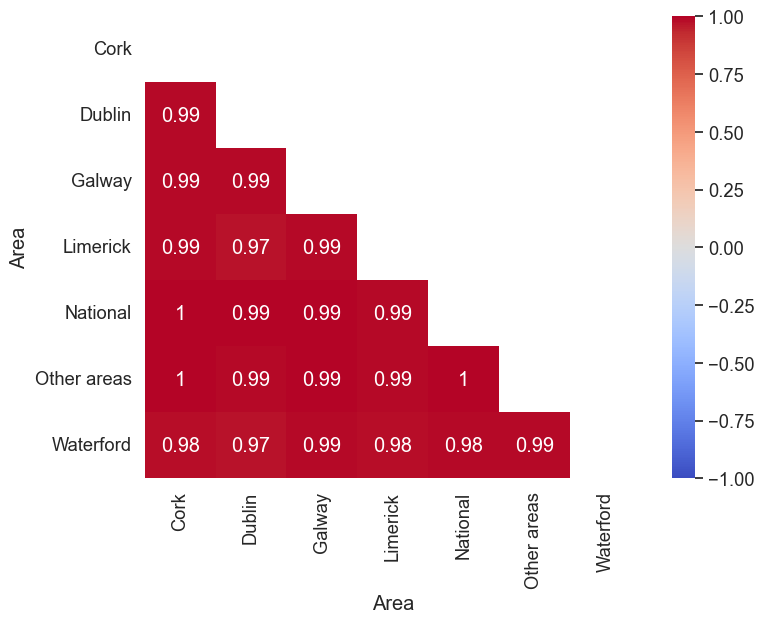

In [35]:
# Creating a figure and computing the correlation matrix using the df_combo dataframe.
plt.figure(figsize=(8,6)) # Setting the figure size.
corr_matrix = df_price_ie.corr() # Calculation of the correlation.
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool)) # mask applied to hide the upper triangle.
# Generating the heatmap of the correlation 
sns.set_style('white') # Setting a white background
sns.heatmap(corr_matrix, mask=mask, annot=True, vmin=-1.0, vmax=1.0, cmap='coolwarm')
# vmin/max included, by default the range started from 0.975. Also coolwarn set of colors chosen because is easy for identification. 
plt.show() # Displays the heatmap.

In [36]:
# Creating a grid with pair plots of the prices of new houses.
#plt.figure(figsize=(14, 10)) # Sets the figure size. 
#sns.set(font_scale=0.8)  # Adjusting the font scale.
#sns.pairplot(df_price_ie) # Generates the pair plots.
#plt.tight_layout() # Adjusts the layout.
#plt.show() # Displays the grid.

## Distribution of the new house prices in Ireland.

In [37]:
# Creating a list of the columns names to generate a histogram.
columns_price_ie = ['Cork', 'Dublin', 'Galway', 'Limerick', 'National', 'Other areas', 'Waterford']

# Creates a histogram for each column and store them in the name of traces.
traces = [go.Histogram(x=df_price_ie[column], name=column, visible=(i==0)) for i, column in enumerate(columns_price_ie)]
fig = go.Figure(data=traces) # Creates a Figure and add all traces to it

# Defines the layout for the dropdown menu
dropdown_menu = [{'label': column, 'method': 'update', # the labels assigns the name of the column.
                  'args': [{'visible': [i==j for i in range(len(columns_price_ie))]}, # Visible is to display the selected trace. 
                            {'title': f'Histogram of {column}'}]} for j, column in enumerate(columns_price_ie)] # Updates the title while changes.
fig.update_layout(
    updatemenus=[{ # Dictionary including the layout properties of the dropdown menu.
        'active': 0, # Which index will initialize the figure, Cork will be displayed first according to the position (0).
        'buttons': dropdown_menu,
        'showactive': True, # Shows which plot is being looked.
        # Sets the location of the dropdown menu.
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.1,
        'yanchor': 'top'
    }],
    title_text="Histogram of new house prices in Ireland", # Adds title to the figure.
    title_x=0.5, # Centers the title.   
    title_font=dict(size=20),  # Adjusting the size of the title.
    template="plotly_white",  # Use of the white space behing the boxplot.
    height=600, width=800, # Adjusting the size of the figure (height and width).
)
fig.show() # Display the figure with the menu of variables.

## Every single dataset has quaterly datasets

- Prices (stand alone?????) 1975 - 2022
- Employment 2000 - 2022
- Production 2000 - 2022
- Building Permit (m2) - 2000 - 2022
- GVA 1995 - 2022 

## House Prices in Ireland and other Countries

In [38]:
df_prices = pd.read_csv("DP_LIVE_05052023193108061.csv") # Imports the House prices dataset.
display(df_prices) # Displays head, tail and shape. 

LOCATION  INDICATOR SUBJECT  MEASURE FREQUENCY     TIME       Value  \
0         BEL  HOUSECOST    REAL  IDX2015         Q  1975-Q1   40.303763   
1         BEL  HOUSECOST    REAL  IDX2015         Q  1975-Q2   40.850524   
2         BEL  HOUSECOST    REAL  IDX2015         Q  1975-Q3   41.188720   
3         BEL  HOUSECOST    REAL  IDX2015         Q  1975-Q4   42.728474   
4         BEL  HOUSECOST    REAL  IDX2015         Q  1976-Q1   45.230444   
...       ...        ...     ...      ...       ...      ...         ...   
1146      NOR  HOUSECOST    REAL  IDX2015         Q  2021-Q4  117.800208   
1147      NOR  HOUSECOST    REAL  IDX2015         Q  2022-Q1  120.844463   
1148      NOR  HOUSECOST    REAL  IDX2015         Q  2022-Q2  119.854129   
1149      NOR  HOUSECOST    REAL  IDX2015         Q  2022-Q3  116.923962   
1150      NOR  HOUSECOST    REAL  IDX2015         Q  2022-Q4  113.906896   

      Flag Codes  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
1146         NaN  
1147         NaN  
1148         NaN  
1149         NaN  
1150         NaN  

[1151 rows x 8 columns]

In [39]:
df_prices.isnull().sum() # Checks for missing values.

LOCATION         0
INDICATOR        0
SUBJECT          0
MEASURE          0
FREQUENCY        0
TIME             0
Value            0
Flag Codes    1151
dtype: int64

In [40]:
df_prices.info() # Checks the type of the variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    1151 non-null   object 
 1   INDICATOR   1151 non-null   object 
 2   SUBJECT     1151 non-null   object 
 3   MEASURE     1151 non-null   object 
 4   FREQUENCY   1151 non-null   object 
 5   TIME        1151 non-null   object 
 6   Value       1151 non-null   float64
 7   Flag Codes  0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 72.1+ KB


In [41]:
# Pivoting, using time as index, location as new columns and assigning the values to the right quarter. 
df_prices = df_prices.pivot(index='TIME', columns='LOCATION', values='Value')
display(df_prices) # Dsplays the dataset, to check no only the command but also the new shape.

LOCATION         BEL         DNK         FIN         IRL         NLD  \
TIME                                                                   
1975-Q1    40.303763   53.030912   58.685752   35.221585   46.320257   
1975-Q2    40.850524   54.138837   57.980352   35.441232   46.613290   
1975-Q3    41.188720   55.152436   57.779230   35.626890   47.012849   
1975-Q4    42.728474   53.418028   60.092896   35.605770   49.591973   
1976-Q1    45.230444   54.005247   56.014798   35.325497   51.796401   
...              ...         ...         ...         ...         ...   
2021-Q4   114.651640  130.289391  104.304912  135.550803  155.445492   
2022-Q1   113.240542  128.810321  103.610355  138.598944  158.809881   
2022-Q2   112.980034  125.877345  101.905494  138.179618  159.248596   
2022-Q3   111.319935  119.947755   99.797370  139.061381  155.447370   
2022-Q4   109.198225  112.327950   95.402097  139.015842         NaN   

LOCATION         NOR  
TIME                  
1975-Q1    33.049371  
1975-Q2    32.570376  
1975-Q3    32.415759  
1975-Q4    32.569633  
1976-Q1    32.072782  
...              ...  
2021-Q4   117.800208  
2022-Q1   120.844463  
2022-Q2   119.854129  
2022-Q3   116.923962  
2022-Q4   113.906896  

[192 rows x 6 columns]

In [42]:
df_prices.isnull().sum() # Checks for missing values.

LOCATION
BEL    0
DNK    0
FIN    0
IRL    0
NLD    1
NOR    0
dtype: int64

In [43]:
df_prices.describe() # Display descriptive statistics. 

LOCATION         BEL         DNK         FIN         IRL         NLD  \
count     192.000000  192.000000  192.000000  192.000000  191.000000   
mean       70.418825   75.272673   79.513398   80.554696   85.390414   
std        25.895337   26.937668   19.981903   38.703088   33.652240   
min        34.395937   39.813162   47.746298   33.871021   39.824344   
25%        48.132034   53.044418   60.263464   46.083704   50.222038   
50%        62.572759   66.325984   78.103715   75.946334   82.057954   
75%        98.868598   96.873022  100.594028  117.168708  116.353011   
max       115.474096  132.371355  104.838268  160.250644  159.248596   

LOCATION         NOR  
count     192.000000  
mean       60.126478  
std        29.424479  
min        28.144552  
25%        33.044289  
50%        46.428040  
75%        85.368039  
max       120.844463

In [44]:
df_prices.index = pd.to_datetime(df_prices.index) # Changes the index to datetime, using pandas. 
df_prices = df_prices.interpolate(method='time')

In [45]:
df_prices.describe() # Display descriptive statistics.

LOCATION         BEL         DNK         FIN         IRL         NLD  \
count     192.000000  192.000000  192.000000  192.000000  192.000000   
mean       70.418825   75.272673   79.513398   80.554696   85.755294   
std        25.895337   26.937668   19.981903   38.703088   33.942694   
min        34.395937   39.813162   47.746298   33.871021   39.824344   
25%        48.132034   53.044418   60.263464   46.083704   50.505987   
50%        62.572759   66.325984   78.103715   75.946334   83.324849   
75%        98.868598   96.873022  100.594028  117.168708  116.805814   
max       115.474096  132.371355  104.838268  160.250644  159.248596   

LOCATION         NOR  
count     192.000000  
mean       60.126478  
std        29.424479  
min        28.144552  
25%        33.044289  
50%        46.428040  
75%        85.368039  
max       120.844463

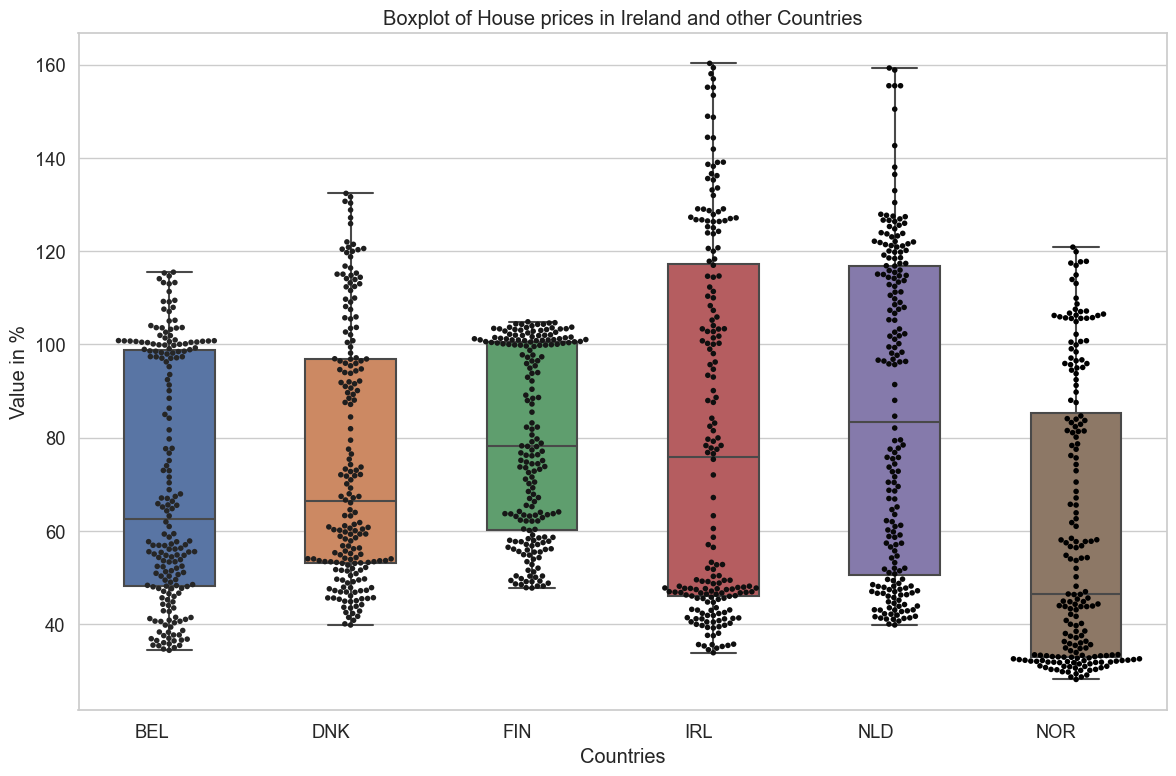

In [46]:
plt.figure(figsize=(12, 8)) # Set up the plot and adjust the figure size.
sns.set(style="whitegrid", font_scale=1.2) # Add a whitegrid in the backgound for clear visualization.
# Creates the boxplot with all the columns.
ax = sns.boxplot(data=df_prices[['BEL','DNK','FIN','IRL','NLD','NOR']], width=0.5) # Sets the width to 0.5
ax.set_xticklabels(['BEL','DNK','FIN','IRL','NLD','NOR'], ha='right') # Add labels and ha argument used to align the labels to the designated boxplot.
ax.set_xlabel('Countries') # Adds x-axis label.
ax.set_ylabel('Value in %') # Adds y-axis label.
ax.set_title('Boxplot of House prices in Ireland and other Countries') # Sets title to tle boxplot.

# Adds individual data points applying swarmplot for each boxplot.
sns.swarmplot(data=df_prices[['BEL','DNK','FIN','IRL','NLD','NOR']], 
              color='black', size=4) # Adjust the size and picking black dots because stands out from the colors of the boxes.

plt.tight_layout() # Adjusts the layout.
plt.show() # Shows the plot.

In [47]:
# Create line traces
traces_prices = [] # List to store the traces.
for column in df_prices.columns: # Loop for each column. 
    trace_prices = go.Scatter( # Generates a trace for each of the variables in the dataset. 
        x=df_prices.index, # Setting the x-axis as the index. 
        y=df_prices[column], # Assigning values for the y-axi for each column.
        name=column) # Adding the name of the column to the trace.
    traces_prices.append(trace_prices) # Using .append it adds the traces generated to the traces_prices list, which were empty in the begining of the code.

layout = go.Layout( # Create the layout for the figure
    title='House Prices over time in selected Countries', # Add title to the line plot.
    # Sets title for x and y axis. Also, color=black and increasing its size for better visualization and differentiation between other lines.
    xaxis=dict(title='Quarters', showline=True, linewidth=2, linecolor='black'),
    yaxis=dict(title='Values in %', showline=True, linewidth=2, linecolor='black'),
    hovermode='closest',
    plot_bgcolor='white')  # Add white background for better observation of all the lines.

fig = go.Figure(data=traces_prices, layout=layout) # Create the figure with the traces and layout
fig.show() # Shows the figure


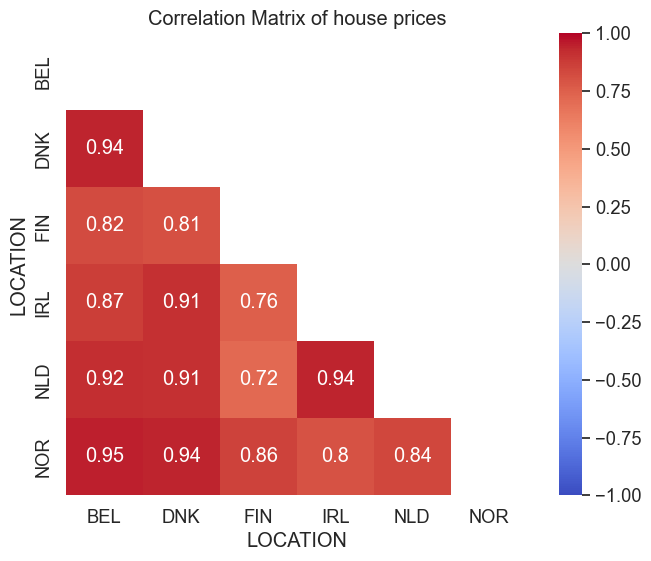

In [48]:
corr_df_prices = df_prices.corr() # Calculating the correlation matrix
mask = np.triu(np.ones_like(corr_df_prices, dtype=np.bool)) # mask applied to hide the upper triangle.
plt.figure(figsize=(8, 6))# Set the figure size.
sns.set(font_scale=1.2) # Adjust the font scale.
sns.set_style('white') # Adds white space in the background for clear visualization of the matrix.
# Adjusting the vmin/max, because the variables are high correlated the min was to high, misleading the visualization.  
sns.heatmap(corr_df_prices, mask=mask, annot=True, vmin=-1.0, vmax=1.0, cmap='coolwarm', square=True)

plt.title('Correlation Matrix of house prices') # Sets the title of the matrix
plt.show() # Shows the correlation matrix.

In [49]:
#plt.figure(figsize=(14, 10)) # Sets the figure size.
#sns.pairplot(df_prices) # Create the pairplot for the house prices dataset. 
#plt.tight_layout() # Adjust the layout. 
#plt.show() # Shows the pairplot grid.

## Distribution of df_prices

- Overlaid Histograms with kde curve attempted, but the figure was considered difficult to interpret. Thus, ploting each histogram side by side.

<Figure size 1600x1200 with 0 Axes>

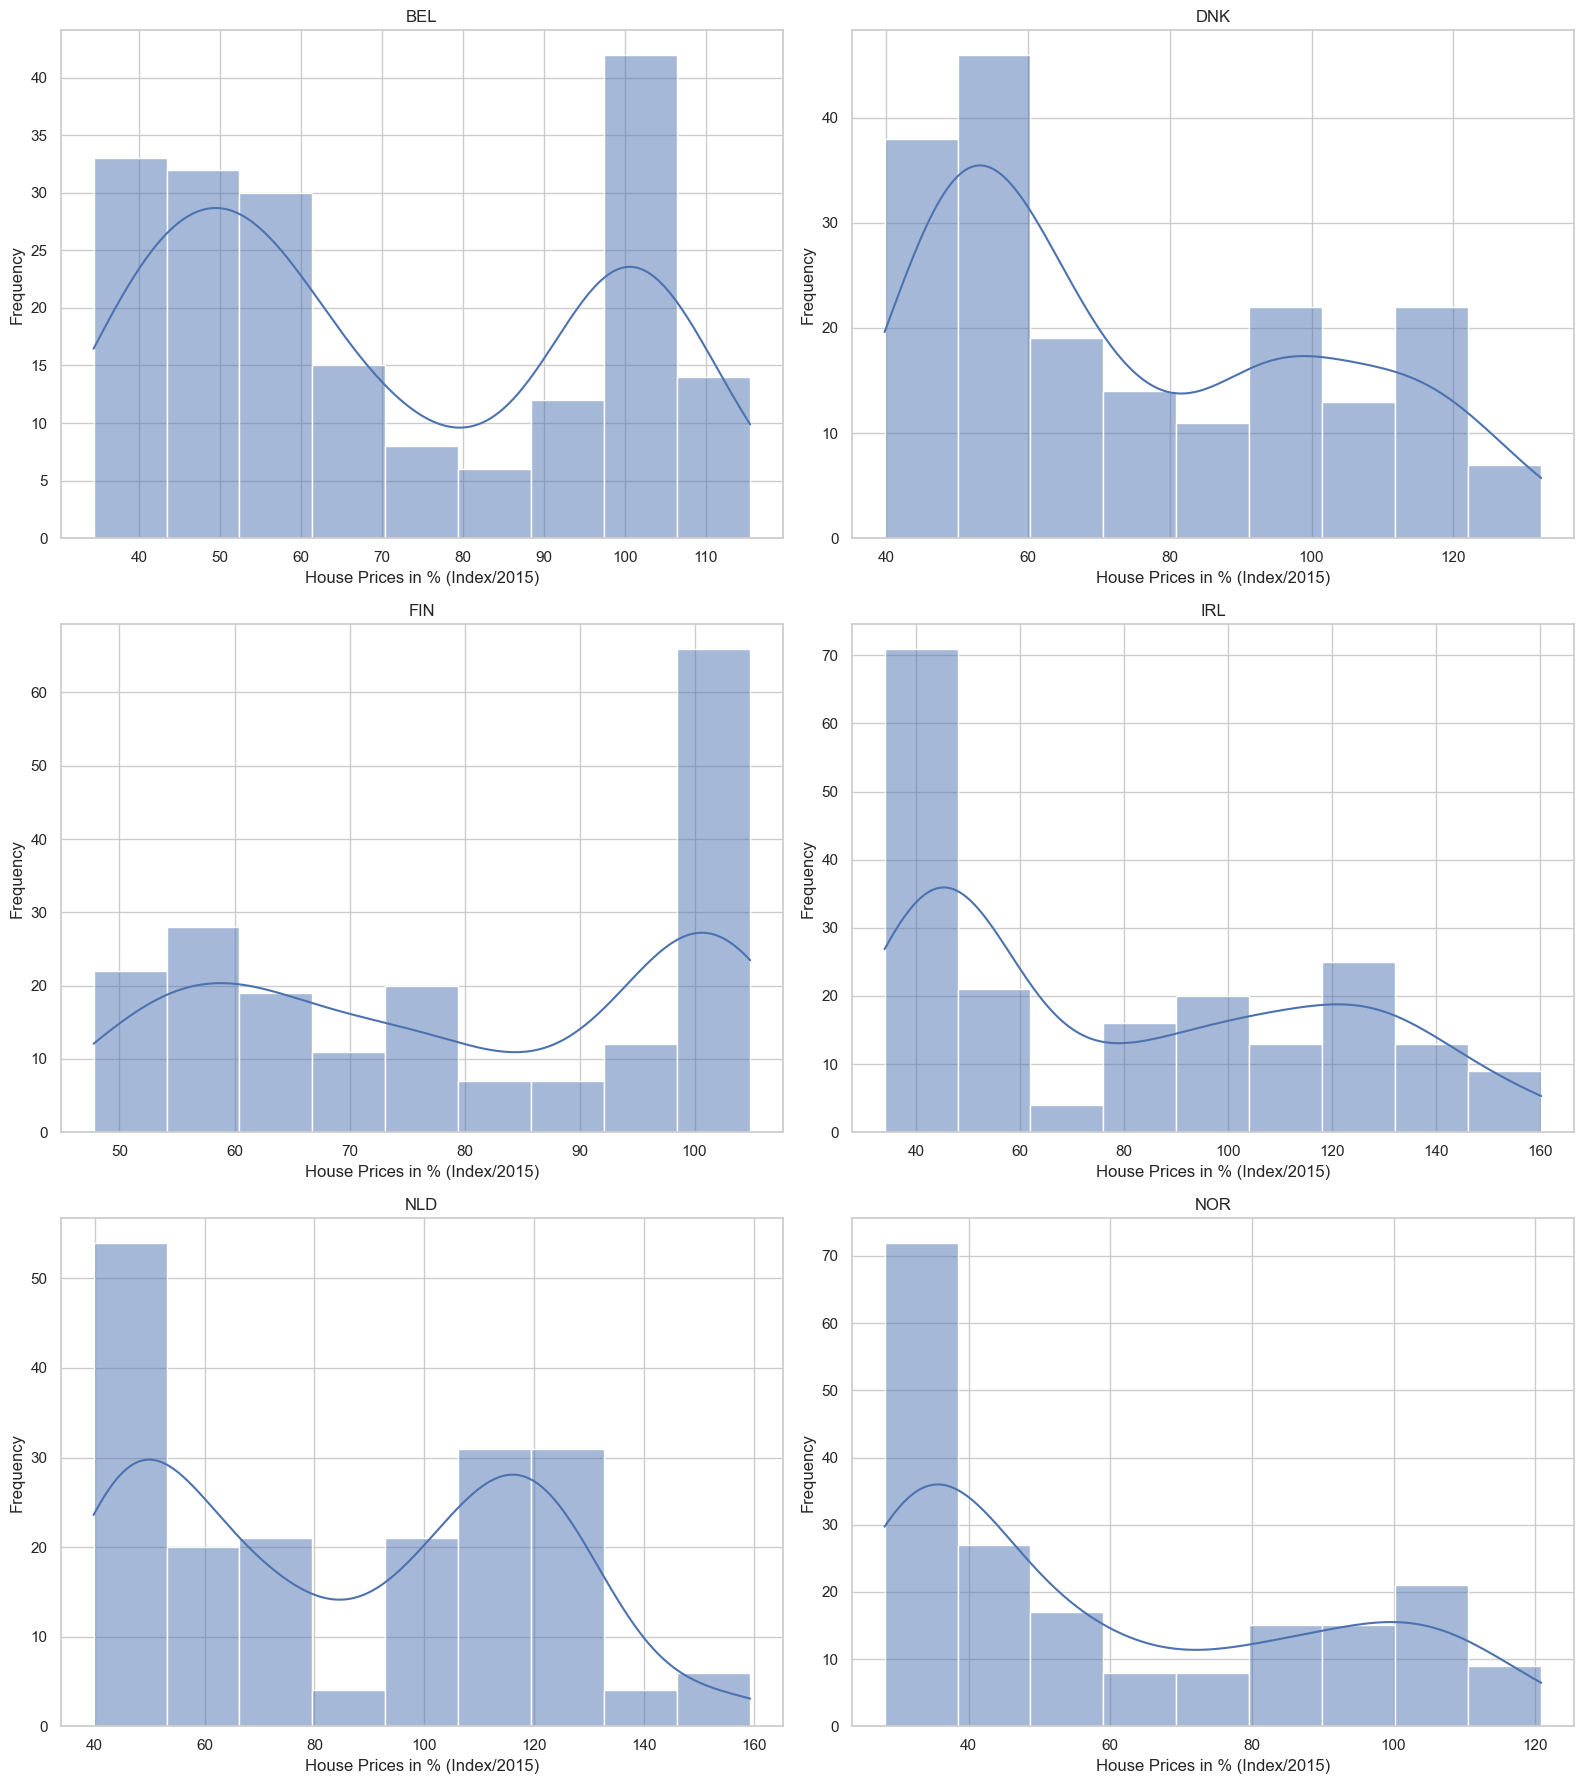

In [50]:
# Set the figure size and style
plt.figure(figsize=(16, 12)) # Sets the image size.
sns.set(style='whitegrid') # Add whitegrid style, which background with gridlines for better visualization. 
# Determining the number of rows and columns for subplots, which is 6 (countries).
num_rows = 3
num_cols = 2

# Creating subplots 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6*num_rows))
# Creates a 1D array to facilitate the repetions.
axes = axes.flatten() 
# Iterate over the columns and create a histogram for each
for i, column in enumerate(df_prices.columns): # loop for each column 
    ax = axes[i]  # Get the current axis
    sns.histplot(df_prices[column], kde=True, ax=ax)
    ax.set_title(column)  # Set the title for the current subplot
    ax.set_xlabel('House Prices in % (Index/2015)')  # Set the x-label for the current subplot
    ax.set_ylabel('Frequency')  # Set the y-label for the current subplot
fig.tight_layout() # Adjusts the layout and spacing
plt.show() # Display the grid with histograms.

## Employment in Ireland and other Countries

In [51]:
df_employ = pd.read_csv("DP_LIVE_05052023184942383.csv") # Imports the employment (6 coutries) dataset. 
display(df_employ) # Displays the head, tail and shape. 

LOCATION INDICATOR SUBJECT   MEASURE FREQUENCY     TIME     Value  \
0         AUS  EMPINDUS  CONSTR  THND_PER         Q  1985-Q1  474.5540   
1         AUS  EMPINDUS  CONSTR  THND_PER         Q  1985-Q2  483.0865   
2         AUS  EMPINDUS  CONSTR  THND_PER         Q  1985-Q3  485.2054   
3         AUS  EMPINDUS  CONSTR  THND_PER         Q  1985-Q4  481.3309   
4         AUS  EMPINDUS  CONSTR  THND_PER         Q  1986-Q1  464.8127   
...       ...       ...     ...       ...       ...      ...       ...   
4158      CRI  EMPINDUS  CONSTR  THND_PER         Q  2021-Q4  111.4110   
4159      CRI  EMPINDUS  CONSTR  THND_PER         Q  2022-Q1  127.6930   
4160      CRI  EMPINDUS  CONSTR  THND_PER         Q  2022-Q2  125.5660   
4161      CRI  EMPINDUS  CONSTR  THND_PER         Q  2022-Q3  155.0060   
4162      CRI  EMPINDUS  CONSTR  THND_PER         Q  2022-Q4  153.6120   

     Flag Codes  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
4158        NaN  
4159        NaN  
4160        NaN  
4161        NaN  
4162        NaN  

[4163 rows x 8 columns]

- The employment data was downloaded with all the countries,  so the next line of code will select only he countries that being analysed which is Netherlands, Belgium, Denmark, Finland, Ireland and Norway.  

In [52]:
countries_to_select = ['NLD', 'BEL', 'DNK', 'FIN', 'IRL', 'NOR']  # Creating a list of countries to select.
df_employ = df_employ[df_employ['LOCATION'].isin(countries_to_select)] #isin creating a boolean to return only the countries selected.
display(df_employ) # Displays head, tail and shape of the dataset to check the command applied and its new shape.

LOCATION INDICATOR SUBJECT   MEASURE FREQUENCY     TIME  Value Flag Codes
248       BEL  EMPINDUS  CONSTR  THND_PER         Q  1999-Q1  270.7        NaN
249       BEL  EMPINDUS  CONSTR  THND_PER         Q  1999-Q2  248.8        NaN
250       BEL  EMPINDUS  CONSTR  THND_PER         Q  1999-Q3  280.5        NaN
251       BEL  EMPINDUS  CONSTR  THND_PER         Q  1999-Q4  291.0        NaN
252       BEL  EMPINDUS  CONSTR  THND_PER         Q  2000-Q1  261.4        NaN
...       ...       ...     ...       ...       ...      ...    ...        ...
2093      NOR  EMPINDUS  CONSTR  THND_PER         Q  2021-Q4  236.5        NaN
2094      NOR  EMPINDUS  CONSTR  THND_PER         Q  2022-Q1  243.0        NaN
2095      NOR  EMPINDUS  CONSTR  THND_PER         Q  2022-Q2  240.8        NaN
2096      NOR  EMPINDUS  CONSTR  THND_PER         Q  2022-Q3  233.0        NaN
2097      NOR  EMPINDUS  CONSTR  THND_PER         Q  2022-Q4  229.2        NaN

[578 rows x 8 columns]

In [53]:
df_employ.isnull().sum() # Checks for missing values.

LOCATION        0
INDICATOR       0
SUBJECT         0
MEASURE         0
FREQUENCY       0
TIME            0
Value           0
Flag Codes    577
dtype: int64

In [54]:
rows_with_missing_values = df_employ[df_employ.isna().any(axis=1)] # Locate rows with missing values
print(rows_with_missing_values) # Display rows with missing values

     LOCATION INDICATOR SUBJECT   MEASURE FREQUENCY     TIME  Value Flag Codes
248       BEL  EMPINDUS  CONSTR  THND_PER         Q  1999-Q1  270.7        NaN
249       BEL  EMPINDUS  CONSTR  THND_PER         Q  1999-Q2  248.8        NaN
250       BEL  EMPINDUS  CONSTR  THND_PER         Q  1999-Q3  280.5        NaN
251       BEL  EMPINDUS  CONSTR  THND_PER         Q  1999-Q4  291.0        NaN
252       BEL  EMPINDUS  CONSTR  THND_PER         Q  2000-Q1  261.4        NaN
...       ...       ...     ...       ...       ...      ...    ...        ...
2093      NOR  EMPINDUS  CONSTR  THND_PER         Q  2021-Q4  236.5        NaN
2094      NOR  EMPINDUS  CONSTR  THND_PER         Q  2022-Q1  243.0        NaN
2095      NOR  EMPINDUS  CONSTR  THND_PER         Q  2022-Q2  240.8        NaN
2096      NOR  EMPINDUS  CONSTR  THND_PER         Q  2022-Q3  233.0        NaN
2097      NOR  EMPINDUS  CONSTR  THND_PER         Q  2022-Q4  229.2        NaN

[577 rows x 8 columns]


In [55]:
# Pivoting, using time as index, location as new columns and assigning the values to the right quarter. 
df_employ = df_employ.pivot(index='TIME', columns='LOCATION', values='Value')
display(df_employ) # Displays head, tail and shape of the dataset to check the command applied, also the new shape.

LOCATION    BEL       DNK       FIN       IRL    NLD    NOR
TIME                                                       
1998-Q1     NaN       NaN  131.8345       NaN    NaN    NaN
1998-Q2     NaN  179.1736  131.6632  126.2294    NaN    NaN
1998-Q3     NaN  181.4361  139.2066  128.8369    NaN    NaN
1998-Q4     NaN  183.2484  140.6957  132.4804    NaN    NaN
1999-Q1   270.7  185.1538  145.1814  137.1355    NaN    NaN
...         ...       ...       ...       ...    ...    ...
2021-Q4   310.9  191.4664  185.3855  152.8387  391.2  236.5
2022-Q1   318.9  205.0974  187.1955  160.3617  395.2  243.0
2022-Q2   312.7  209.7298  188.1978  167.7926  415.4  240.8
2022-Q3   298.8  188.4142  182.0648  167.8307  426.3  233.0
2022-Q4   315.3  174.1586  182.6420  164.8150  422.1  229.2

[100 rows x 6 columns]

In [56]:
start = '1998-Q1' # Creating a start date to drop.
end = '1999-Q4' # Setting a end date for the drop.
drop_rows = df_employ.loc[start:end].index # Drops the observation given the time frame given by start and end.
df_employ = df_employ.drop(drop_rows) # Apply the drop. 
df_employ.head() # Displays the first five rows to check the drop command. 

LOCATION    BEL       DNK       FIN       IRL       NLD       NOR
TIME                                                             
2000-Q1   261.4  176.3358  150.4078  160.9504  449.1700  141.5286
2000-Q2   252.3  182.6889  151.6028  167.4928  450.3242  146.8555
2000-Q3   278.3  180.4393  147.5218  172.8381  458.2339  150.6292
2000-Q4   254.9  193.0360  146.5676  177.4187  471.0719  150.1866
2001-Q1   254.7  190.6733  144.9758  180.5635  481.6043  151.0687

In [57]:
df_employ.info() # Displays the type of each variable.

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 2000-Q1 to 2022-Q4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BEL     92 non-null     float64
 1   DNK     92 non-null     float64
 2   FIN     92 non-null     float64
 3   IRL     92 non-null     float64
 4   NLD     92 non-null     float64
 5   NOR     92 non-null     float64
dtypes: float64(6)
memory usage: 5.0+ KB


In [58]:
df_employ.describe() # Displays descriptive statistics. 

LOCATION         BEL         DNK         FIN         IRL         NLD  \
count      92.000000   92.000000   92.000000   92.000000   92.000000   
mean      306.454348  177.701092  171.688042  157.701083  444.277173   
std        29.368752   15.325430   15.781581   57.552913   39.615097   
min       245.000000  145.578800  142.822900   82.058200  389.300000   
25%       280.575000  166.699250  160.397050  111.487500  406.850000   
50%       314.800000  177.816450  174.342800  145.854700  443.350000   
75%       327.925000  190.848975  184.914975  190.066450  477.672600   
max       362.200000  209.729800  200.376100  289.259100  520.201000   

LOCATION         NOR  
count      92.000000  
mean      190.332605  
std        27.280398  
min       141.528600  
25%       161.830400  
50%       189.682300  
75%       211.166725  
max       243.000000

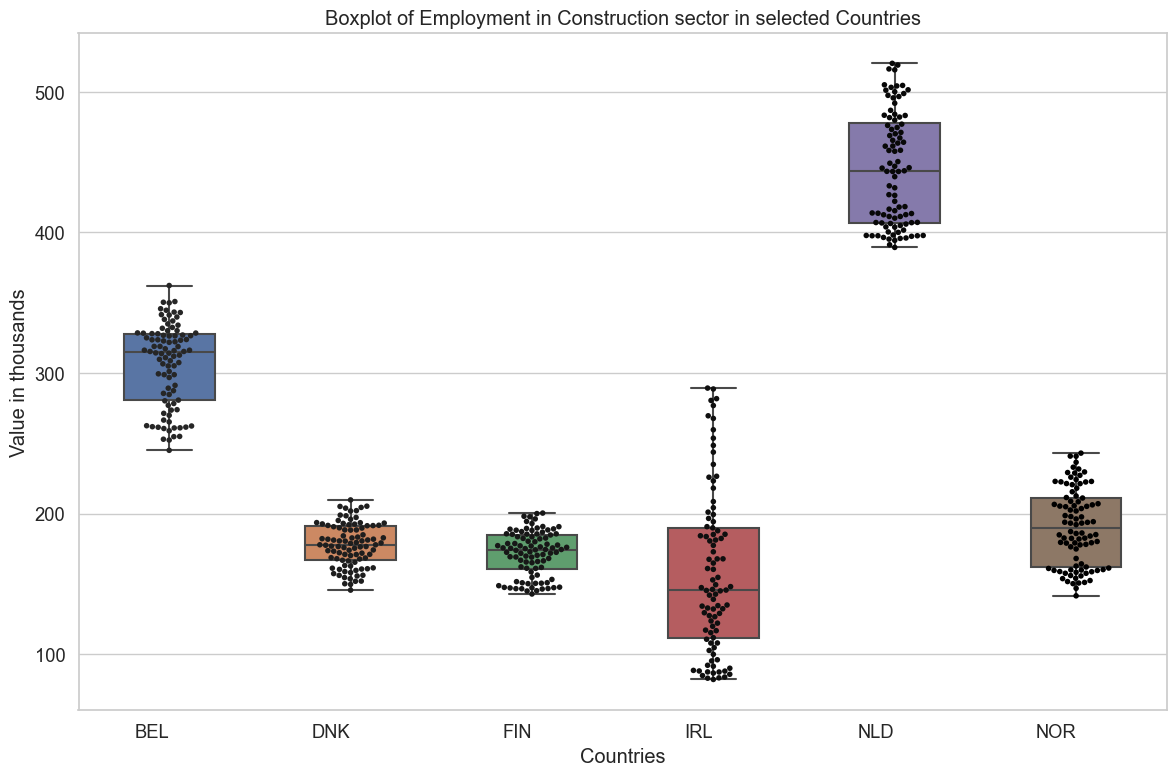

In [59]:
plt.figure(figsize=(12, 8)) # Set up the plot and adjusts the figure size.
sns.set(style="whitegrid", font_scale=1.2) # Adds white space in the background and adjusts the fon scale.
# Creates the boxplot of all countries. 
ax = sns.boxplot(data=df_employ[['BEL','DNK','FIN','IRL','NLD','NOR']], width=0.5) # Selects the columns and adjust the width of the box.
ax.set_xticklabels(['BEL','DNK','FIN','IRL','NLD','NOR'], ha='right') # Add labels and the ha argument added to allign the label with the boxplot.
ax.set_xlabel('Countries') # Sets x-axis label.
ax.set_ylabel('Value in thousands') # Sets y-axis label.
ax.set_title('Boxplot of Employment in Construction sector in selected Countries') # Add title to the figure.
# Add individual dots for each data point using swarmplot.
sns.swarmplot(data=df_employ[['BEL','DNK','FIN','IRL','NLD','NOR']], color='black', size=4) # Adjusting the size of the dots for clear visualization.
plt.tight_layout() # Adjust the layout
plt.show() # Shows the plot

## standard scaler? 

In [60]:
# Create line traces
traces_employ = [] # List to store the traces.
for column in df_employ.columns: # Loop for each column. 
    trace_employ = go.Scatter( # Generates a trace for each of the variables in the dataset. 
        x=df_employ.index, # Setting the x-axis as the index. 
        y=df_employ[column], # Assigning values for the y-axi for each column.
        name=column) # Adding the name of the column to the trace.
    traces_employ.append(trace_employ) # Using .append it adds the traces generated to the traces_prices list, which were empty in the begining of the code.

layout = go.Layout( # Create the layout for the figure
    title='Employment in Construction over time in selected Countries', # Add title to the line plot.
    # Sets title for x and y axis. Also, color=black and increasing its size for better visualization and differentiation between other lines.
    xaxis=dict(title='Quarters', showline=True, linewidth=2, linecolor='black'),
    yaxis=dict(title='Values in %', showline=True, linewidth=2, linecolor='black'),
    hovermode='closest',
    plot_bgcolor='white')  # Add white background for better observation of all the lines.

fig = go.Figure(data=traces_employ, layout=layout) # Create the figure with the traces and layout
fig.show() # Shows the figure

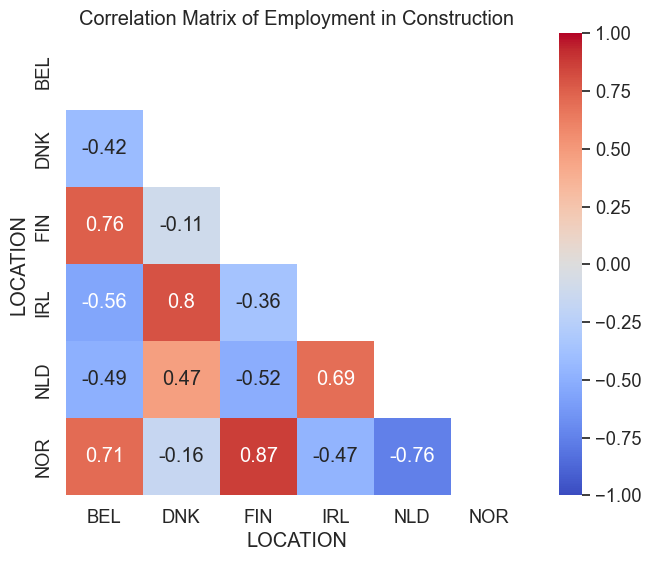

In [61]:
corr_df_employ = df_employ.corr() # Calculating the correlation matrix for the employment dataset.
mask = np.triu(np.ones_like(corr_df_employ, dtype=np.bool)) # mask applied to hide the upper triangle.
plt.figure(figsize=(8, 6))# Sets the figure size
# Set the style of the heatmap
sns.set(font_scale=1.2) # Adjust font scale.
sns.set_style('white') # Add a white background for clear visualization of the matrix.
# Setting the vmax and vmin, coolwarm set of colors chosen for the facility to identify if is strong or weak correlation.
sns.heatmap(corr_df_employ, mask=mask, annot=True, vmin=-1.0, vmax=1.0, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Employment in Construction') # Sets the title of the matrix.
plt.show() # Display the matrix.

In [62]:
#plt.figure(figsize=(14, 10)) # Sets figure size.
#sns.pairplot(df_employ) # Generates pairplot for df_employ.
#plt.tight_layout() # Adjust layout and spacing.
#plt.show() # Displays the pairplots.

## Distribution

<Figure size 1600x1200 with 0 Axes>

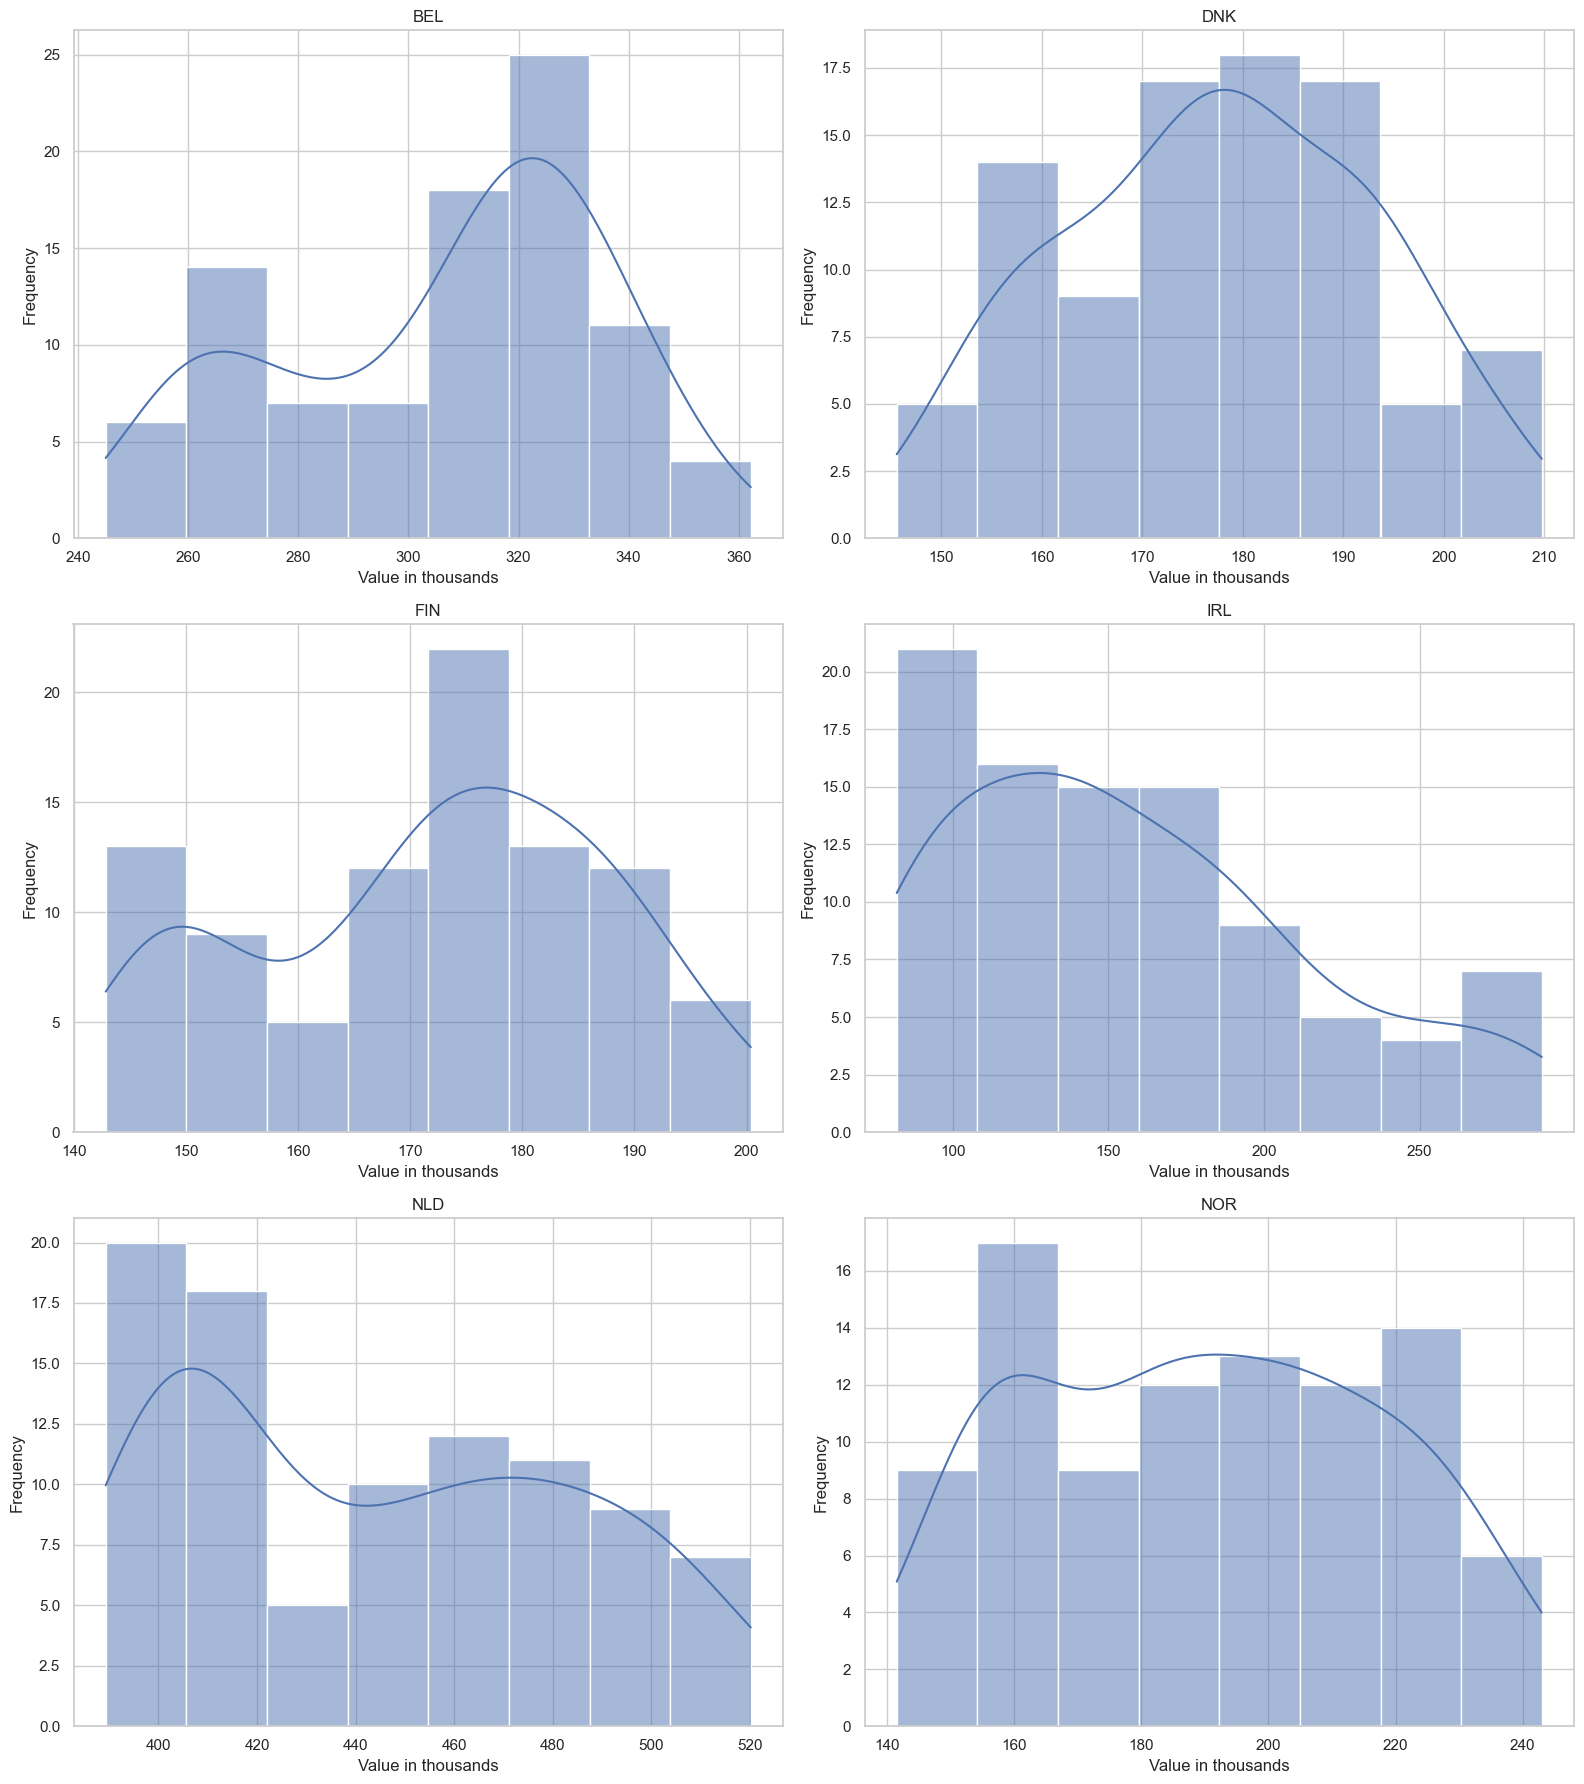

In [63]:
plt.figure(figsize=(16, 12)) # Sets the image size.
sns.set(style='whitegrid') # Add whitegrid style, which background with gridlines for better visualization. 
# Determining the number of rows and columns for subplots, which is 6 (countries).
num_rows = 3
num_cols = 2

# Creating subplots 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6*num_rows))
# Creates a 1D array to facilitate the repetions.
axes = axes.flatten() 
# Iterate over the columns and create a histogram for each
for i, column in enumerate(df_employ.columns): # loop for each column 
    ax = axes[i]  # Get the current axis
    sns.histplot(df_employ[column], kde=True, ax=ax)
    ax.set_title(column)  # Set the title for the current subplot
    ax.set_xlabel('Value in thousands')  # Set the x-label for the current subplot
    ax.set_ylabel('Frequency')  # Set the y-label for the current subplot
fig.tight_layout() # Adjusts the layout and spacing
plt.show() # Display the grid with histograms.

## Production in Construction Ireland and other Countries

In [64]:
df_prod = pd.read_csv("sts_copr_q__custom_6094843_linear.csv") # Imports the production dataset. 
display(df_prod) # Displays the head, tail and shape of the dataset.

DATAFLOW        LAST UPDATE freq indic_bt nace_r2 s_adj  \
0    ESTAT:STS_COPR_Q(1.0)  05/05/23 11:00:00    Q     PROD       F   SCA   
1    ESTAT:STS_COPR_Q(1.0)  05/05/23 11:00:00    Q     PROD       F   SCA   
2    ESTAT:STS_COPR_Q(1.0)  05/05/23 11:00:00    Q     PROD       F   SCA   
3    ESTAT:STS_COPR_Q(1.0)  05/05/23 11:00:00    Q     PROD       F   SCA   
4    ESTAT:STS_COPR_Q(1.0)  05/05/23 11:00:00    Q     PROD       F   SCA   
..                     ...                ...  ...      ...     ...   ...   
568  ESTAT:STS_COPR_Q(1.0)  05/05/23 11:00:00    Q     PROD       F   SCA   
569  ESTAT:STS_COPR_Q(1.0)  05/05/23 11:00:00    Q     PROD       F   SCA   
570  ESTAT:STS_COPR_Q(1.0)  05/05/23 11:00:00    Q     PROD       F   SCA   
571  ESTAT:STS_COPR_Q(1.0)  05/05/23 11:00:00    Q     PROD       F   SCA   
572  ESTAT:STS_COPR_Q(1.0)  05/05/23 11:00:00    Q     PROD       F   SCA   

    unit geo TIME_PERIOD  OBS_VALUE OBS_FLAG  
0    I15  BE     2000-Q1       97.1      NaN  
1    I15  BE     2000-Q2       98.4      NaN  
2    I15  BE     2000-Q3       98.5      NaN  
3    I15  BE     2000-Q4       99.2      NaN  
4    I15  BE     2001-Q1       97.4      NaN  
..   ...  ..         ...        ...      ...  
568  I15  NO     2022-Q1      123.2      NaN  
569  I15  NO     2022-Q2      124.1      NaN  
570  I15  NO     2022-Q3      123.0      NaN  
571  I15  NO     2022-Q4      123.9      NaN  
572  I15  NO     2023-Q1      123.7      NaN  

[573 rows x 11 columns]

- Different sources, the first two from eurostat and this from oecd, last 2 datasets country codes with 3 letters now with 2.

In [65]:
import pycountry
def country_alpha2_to_country_alpha3(cn_a2):
    try:
        return pycountry.countries.get(alpha_2=cn_a2).alpha_3
    except:
        return 'Undefined'
    
# Apply the function to the 'country_alpha2' column and create a new column 'country_alpha3'
df_prod['country_alpha3'] = df_prod['geo'].apply(country_alpha2_to_country_alpha3)

df_prod.head()

DATAFLOW        LAST UPDATE freq indic_bt nace_r2 s_adj unit  \
0  ESTAT:STS_COPR_Q(1.0)  05/05/23 11:00:00    Q     PROD       F   SCA  I15   
1  ESTAT:STS_COPR_Q(1.0)  05/05/23 11:00:00    Q     PROD       F   SCA  I15   
2  ESTAT:STS_COPR_Q(1.0)  05/05/23 11:00:00    Q     PROD       F   SCA  I15   
3  ESTAT:STS_COPR_Q(1.0)  05/05/23 11:00:00    Q     PROD       F   SCA  I15   
4  ESTAT:STS_COPR_Q(1.0)  05/05/23 11:00:00    Q     PROD       F   SCA  I15   

  geo TIME_PERIOD  OBS_VALUE OBS_FLAG country_alpha3  
0  BE     2000-Q1       97.1      NaN            BEL  
1  BE     2000-Q2       98.4      NaN            BEL  
2  BE     2000-Q3       98.5      NaN            BEL  
3  BE     2000-Q4       99.2      NaN            BEL  
4  BE     2001-Q1       97.4      NaN            BEL

In [66]:
# Pivoting, using time period as index, geo as new columns and assigning the values to the right quarter. 
df_prod = df_prod.pivot(index='TIME_PERIOD', columns='country_alpha3', values='OBS_VALUE')
display(df_prod) # Display the pivoted dataset and the new shape.

country_alpha3   BEL    DNK    FIN    IRL    NLD    NOR
TIME_PERIOD                                            
1995-Q1          NaN    NaN   42.2    NaN    NaN    NaN
1995-Q2          NaN    NaN   42.5    NaN    NaN    NaN
1995-Q3          NaN    NaN   42.7    NaN    NaN    NaN
1995-Q4          NaN    NaN   42.9    NaN    NaN    NaN
1996-Q1          NaN    NaN   44.0    NaN    NaN    NaN
...              ...    ...    ...    ...    ...    ...
2022-Q1         99.3  133.1  121.6  135.5  135.2  123.2
2022-Q2         99.0  133.4  121.3  131.5  134.8  124.1
2022-Q3         99.3  132.9  119.8  129.1  135.6  123.0
2022-Q4         99.3  133.5  118.2  125.1  139.6  123.9
2023-Q1          NaN    NaN    NaN    NaN    NaN  123.7

[113 rows x 6 columns]

In [67]:
start = '1995-Q1' # Creating a start date to drop.
end = '1999-Q4' # Setting a end date for the drop.
drop_rows = df_prod.loc[start:end].index # Drops the observation given the time frame given by start and end.
df_prod = df_prod.drop(drop_rows) # Apply the drop

df_prod = df_prod.drop(df_prod.index[-1]) # Drops the last row.
display(df_prod) # Displays the results of the last 2 drops. 

country_alpha3   BEL    DNK    FIN    IRL    NLD    NOR
TIME_PERIOD                                            
2000-Q1         97.1   85.7   63.7  207.5  109.1   65.1
2000-Q2         98.4   86.5   64.7  215.8  112.6   63.5
2000-Q3         98.5   89.4   64.8  225.5  106.8   63.0
2000-Q4         99.2   90.1   66.6  218.6  113.6   63.4
2001-Q1         97.4   92.1   66.5  218.3  110.6   64.1
...              ...    ...    ...    ...    ...    ...
2021-Q4         96.9  128.7  120.8  140.6  131.4  121.3
2022-Q1         99.3  133.1  121.6  135.5  135.2  123.2
2022-Q2         99.0  133.4  121.3  131.5  134.8  124.1
2022-Q3         99.3  132.9  119.8  129.1  135.6  123.0
2022-Q4         99.3  133.5  118.2  125.1  139.6  123.9

[92 rows x 6 columns]

In [68]:
df_prod.describe() # Shows descriptive statistics.

country_alpha3         BEL         DNK         FIN         IRL         NLD  \
count            92.000000   92.000000   92.000000   92.000000   92.000000   
mean            101.042391  101.981522   92.575000  172.402174  112.123913   
std               3.437966   12.414454   17.734015   84.990736   12.157044   
min              91.100000   85.700000   63.700000   73.000000   88.300000   
25%              98.475000   92.100000   76.575000  101.425000  103.800000   
50%             100.800000   98.650000   94.450000  138.450000  110.550000   
75%             103.525000  109.150000  110.525000  227.425000  122.200000   
max             108.400000  133.500000  121.600000  347.600000  139.600000   

country_alpha3         NOR  
count            92.000000  
mean             90.638043  
std              19.029173  
min              63.000000  
25%              77.625000  
50%              87.400000  
75%             106.550000  
max             124.100000

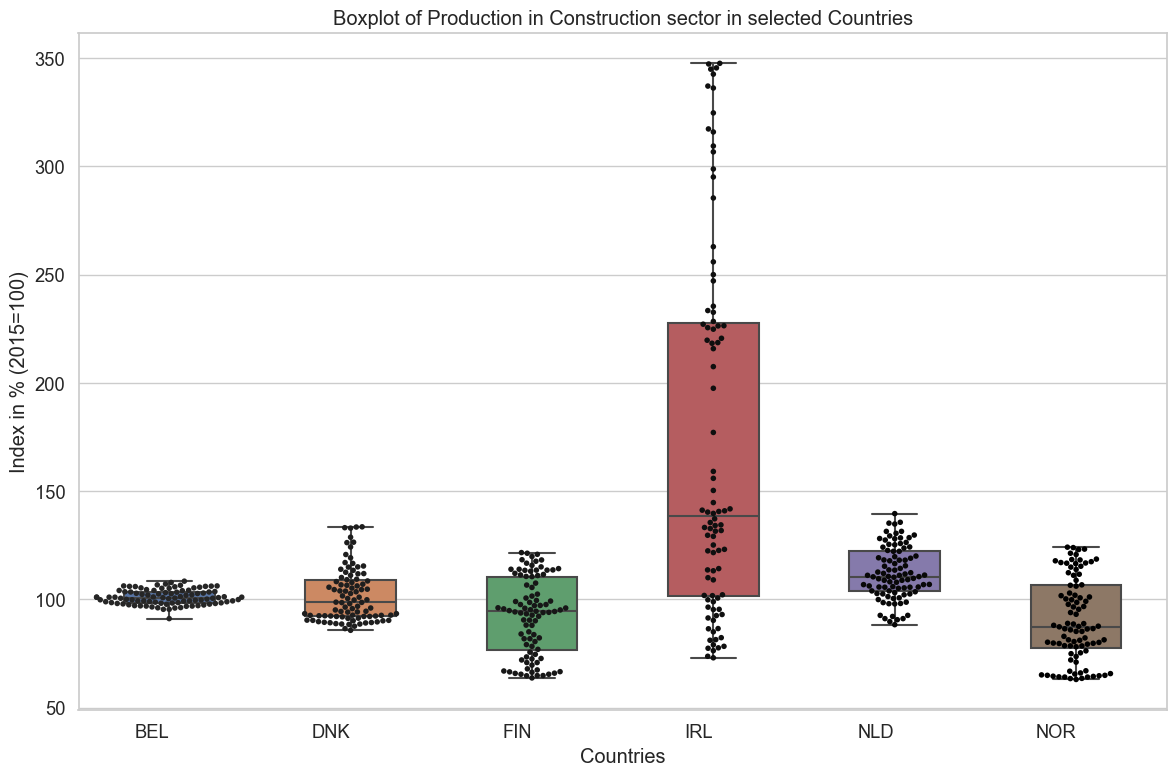

In [69]:
plt.figure(figsize=(12, 8)) # Sets the plot and adjust the size of the image. 
sns.set(style="whitegrid", font_scale=1.2) # Add white in the background for clear visualization.
# Create the boxplot with all the columns.
ax = sns.boxplot(data=df_prod[['BEL','DNK','FIN','IRL','NLD','NOR']], width=0.5) # Select the variables and adjust thw width of the boxplot.
ax.set_xticklabels(['BEL','DNK','FIN','IRL','NLD','NOR'], ha='right') # Adding labels and adding the ha argument to align the labels.
ax.set_xlabel('Countries') # Add x-axis label.
ax.set_ylabel('Index in % (2015=100)') # Add y-axis label.
ax.set_title('Boxplot of Production in Construction sector in selected Countries') # Adds title to the image.
# Add individual points for each data point using swarmplot.
sns.swarmplot(data=df_prod[['BEL','DNK','FIN','IRL','NLD','NOR']], color='black', size=4) # Adjusting the size of the dots and selecting the black color to be easy to identify. 
plt.tight_layout() # Adjust the layout
plt.show() # Shows the image with the boxplots.

## DEFINETELY THE STANDARD SCALER TERRIBLE TO SEE

In [70]:
# Create line traces
traces_prod = [] # List to store the traces.
for column in df_prod.columns: # Loop for each column. 
    trace_prod = go.Scatter( # Generates a trace for each of the variables in the dataset. 
        x=df_prod.index, # Setting the x-axis as the index. 
        y=df_prod[column], # Assigning values for the y-axi for each column.
        name=column) # Adding the name of the column to the trace.
    traces_prod.append(trace_prod) # Using .append it adds the traces generated to the traces_prices list, which were empty in the begining of the code.

layout = go.Layout( # Create the layout for the figure
    title='Production in Construction over time in selected Countries', # Add title to the line plot.
    # Sets title for x and y axis. Also, color=black and increasing its size for better visualization and differentiation between other lines.
    xaxis=dict(title='Quarters', showline=True, linewidth=2, linecolor='black'),
    yaxis=dict(title='Index in % (2015=100)', showline=True, linewidth=2, linecolor='black'),
    hovermode='closest',
    plot_bgcolor='white')  # Add white background for better observation of all the lines.

fig = go.Figure(data=traces_prod, layout=layout) # Create the figure with the traces and layout
fig.show() # Shows the figure

## Building permit index to show the future development of construction (useful area measured in square meters) - explanatory note of the dataset

In [71]:
df_perm = pd.read_csv("sts_cobp_q__custom_6095053_linear.csv") # Imports the building permit dataset.
display(df_perm) # Displays the head, tail and shape. 

DATAFLOW        LAST UPDATE freq indic_bt            cpa2_1  \
0    ESTAT:STS_COBP_Q(1.0)  05/05/23 11:00:00    Q     PSQM  CPA_F41001_41002   
1    ESTAT:STS_COBP_Q(1.0)  05/05/23 11:00:00    Q     PSQM  CPA_F41001_41002   
2    ESTAT:STS_COBP_Q(1.0)  05/05/23 11:00:00    Q     PSQM  CPA_F41001_41002   
3    ESTAT:STS_COBP_Q(1.0)  05/05/23 11:00:00    Q     PSQM  CPA_F41001_41002   
4    ESTAT:STS_COBP_Q(1.0)  05/05/23 11:00:00    Q     PSQM  CPA_F41001_41002   
..                     ...                ...  ...      ...               ...   
543  ESTAT:STS_COBP_Q(1.0)  05/05/23 11:00:00    Q     PSQM  CPA_F41001_41002   
544  ESTAT:STS_COBP_Q(1.0)  05/05/23 11:00:00    Q     PSQM  CPA_F41001_41002   
545  ESTAT:STS_COBP_Q(1.0)  05/05/23 11:00:00    Q     PSQM  CPA_F41001_41002   
546  ESTAT:STS_COBP_Q(1.0)  05/05/23 11:00:00    Q     PSQM  CPA_F41001_41002   
547  ESTAT:STS_COBP_Q(1.0)  05/05/23 11:00:00    Q     PSQM  CPA_F41001_41002   

    s_adj unit geo TIME_PERIOD  OBS_VALUE OBS_FLAG  
0     SCA  I15  BE     2000-Q1      116.4        s  
1     SCA  I15  BE     2000-Q2      112.4        s  
2     SCA  I15  BE     2000-Q3      117.5        s  
3     SCA  I15  BE     2000-Q4      114.1        s  
4     SCA  I15  BE     2001-Q1      112.1        s  
..    ...  ...  ..         ...        ...      ...  
543   SCA  I15  NO     2020-Q4      105.3      NaN  
544   SCA  I15  NO     2021-Q1      100.0      NaN  
545   SCA  I15  NO     2021-Q2      111.2      NaN  
546   SCA  I15  NO     2021-Q3       97.4      NaN  
547   SCA  I15  NO     2021-Q4      110.7      NaN  

[548 rows x 11 columns]

- Dataset from oecd - country code with 2 letters.

In [72]:
def country_alpha2_to_country_alpha3(cn_a2):
    try:
        return pycountry.countries.get(alpha_2=cn_a2).alpha_3
    except:
        return 'Undefined'
    
# Apply the function to the 'country_alpha2' column and create a new column 'country_alpha3'
df_perm['country_alpha3'] = df_perm['geo'].apply(country_alpha2_to_country_alpha3)

df_perm.head()

DATAFLOW        LAST UPDATE freq indic_bt            cpa2_1  \
0  ESTAT:STS_COBP_Q(1.0)  05/05/23 11:00:00    Q     PSQM  CPA_F41001_41002   
1  ESTAT:STS_COBP_Q(1.0)  05/05/23 11:00:00    Q     PSQM  CPA_F41001_41002   
2  ESTAT:STS_COBP_Q(1.0)  05/05/23 11:00:00    Q     PSQM  CPA_F41001_41002   
3  ESTAT:STS_COBP_Q(1.0)  05/05/23 11:00:00    Q     PSQM  CPA_F41001_41002   
4  ESTAT:STS_COBP_Q(1.0)  05/05/23 11:00:00    Q     PSQM  CPA_F41001_41002   

  s_adj unit geo TIME_PERIOD  OBS_VALUE OBS_FLAG country_alpha3  
0   SCA  I15  BE     2000-Q1      116.4        s            BEL  
1   SCA  I15  BE     2000-Q2      112.4        s            BEL  
2   SCA  I15  BE     2000-Q3      117.5        s            BEL  
3   SCA  I15  BE     2000-Q4      114.1        s            BEL  
4   SCA  I15  BE     2001-Q1      112.1        s            BEL

In [73]:
# Pivoting, using time period as index, geo as new columns and assigning the values to the right quarter. 
df_perm = df_perm.pivot(index='TIME_PERIOD', columns='country_alpha3', values='OBS_VALUE')
display(df_perm) # Display the pivoted dataset and the new shape.

country_alpha3    BEL    DNK    FIN    IRL    NLD    NOR
TIME_PERIOD                                             
2000-Q1         116.4  126.6  148.2  371.8  252.9   78.1
2000-Q2         112.4  133.2  130.0  373.1  235.5   68.0
2000-Q3         117.5  134.2  126.4  405.2  194.5   77.2
2000-Q4         114.1  138.1  130.6  409.9  180.7   86.3
2001-Q1         112.1  143.7  128.8  421.0  227.4   80.1
...               ...    ...    ...    ...    ...    ...
2021-Q4         132.5  135.2  115.9  207.0  141.0  110.7
2022-Q1         112.7  128.9  110.2  174.4  125.2    NaN
2022-Q2         107.8  115.6   94.4  164.1  125.3    NaN
2022-Q3         102.2  105.4   86.4  140.7  117.6    NaN
2022-Q4         106.3   92.5   84.2  150.0  123.7    NaN

[92 rows x 6 columns]

In [74]:
df_perm.describe()

country_alpha3         BEL         DNK         FIN         IRL         NLD  \
count            92.000000   92.000000   92.000000   92.000000   92.000000   
mean            112.466304  120.984783  121.573913  236.664130  148.604348   
std              12.756453   28.919995   17.264687  148.237477   46.778287   
min              75.500000   73.300000   84.200000   53.800000   69.100000   
25%             103.950000   97.700000  111.275000  107.350000  117.100000   
50%             112.450000  123.350000  120.650000  188.150000  141.000000   
75%             121.700000  137.050000  130.300000  374.075000  178.000000   
max             137.900000  210.600000  165.500000  555.300000  271.800000   

country_alpha3         NOR  
count            88.000000  
mean             95.650000  
std              13.179852  
min              66.300000  
25%              88.175000  
50%              97.050000  
75%             105.000000  
max             121.500000

## Gross Value Added (GVA) in construction sector in Ireland and selected countries.

In [75]:
df_gva = pd.read_csv("namq_10_a10__custom_6095452_linear.csv") # Imports the gross value added dataset. 
display(df_gva) # Displays the head, tail and shape. 

DATAFLOW        LAST UPDATE freq     unit s_adj nace_r2  \
0    ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
1    ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
2    ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
3    ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
4    ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
..                      ...                ...  ...      ...   ...     ...   
755  ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
756  ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
757  ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
758  ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
759  ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   

    na_item geo TIME_PERIOD  OBS_VALUE OBS_FLAG  
0       B1G  BE     1995-Q1     2662.2      NaN  
1       B1G  BE     1995-Q2     2651.6      NaN  
2       B1G  BE     1995-Q3     2605.9      NaN  
3       B1G  BE     1995-Q4     2587.6      NaN  
4       B1G  BE     1996-Q1     2506.6      NaN  
..      ...  ..         ...        ...      ...  
755     B1G  NO     2021-Q4     6057.1      NaN  
756     B1G  NO     2022-Q1     6245.2      NaN  
757     B1G  NO     2022-Q2     6087.5      NaN  
758     B1G  NO     2022-Q3     6083.6      NaN  
759     B1G  NO     2022-Q4     5884.3      NaN  

[760 rows x 11 columns]

In [76]:
def country_alpha2_to_country_alpha3(cn_a2):
    try:
        return pycountry.countries.get(alpha_2=cn_a2).alpha_3
    except:
        return 'Undefined'
    
# Apply the function to the 'country_alpha2' column and create a new column 'country_alpha3'
df_gva['country_alpha3'] = df_gva['geo'].apply(country_alpha2_to_country_alpha3)

df_gva.head()

DATAFLOW        LAST UPDATE freq     unit s_adj nace_r2  \
0  ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
1  ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
2  ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
3  ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   
4  ESTAT:NAMQ_10_A10(1.0)  02/05/23 23:00:00    Q  CP_MEUR   SCA       F   

  na_item geo TIME_PERIOD  OBS_VALUE OBS_FLAG country_alpha3  
0     B1G  BE     1995-Q1     2662.2      NaN            BEL  
1     B1G  BE     1995-Q2     2651.6      NaN            BEL  
2     B1G  BE     1995-Q3     2605.9      NaN            BEL  
3     B1G  BE     1995-Q4     2587.6      NaN            BEL  
4     B1G  BE     1996-Q1     2506.6      NaN            BEL

In [77]:
# Pivoting, using time period as index, geo as new columns and assigning the values to the right quarter. 
df_gva = df_gva.pivot(index='TIME_PERIOD', columns='country_alpha3', values='OBS_VALUE')
display(df_gva) # Display the pivoted dataset and the new shape.

country_alpha3     BEL     DNK     FIN     IRL      NLD     NOR
TIME_PERIOD                                                    
1978-Q1            NaN     NaN     NaN     NaN      NaN   510.7
1978-Q2            NaN     NaN     NaN     NaN      NaN   526.0
1978-Q3            NaN     NaN     NaN     NaN      NaN   527.7
1978-Q4            NaN     NaN     NaN     NaN      NaN   547.2
1979-Q1            NaN     NaN     NaN     NaN      NaN   508.9
...                ...     ...     ...     ...      ...     ...
2021-Q4         6226.0  4290.9  3759.0  2479.6   9943.1  6057.1
2022-Q1         6464.0  4502.1  3848.0  2411.0   9907.4  6245.2
2022-Q2         6606.0  4730.0  3820.0  3045.4   9855.4  6087.5
2022-Q3         6649.0  4916.0  3855.0  2932.9   9925.9  6083.6
2022-Q4         6765.0  5035.5  3978.0  2704.2  10277.2  5884.3

[180 rows x 6 columns]

In [78]:
df_gva.isnull().sum() # Checking for missing values.

country_alpha3
BEL    68
DNK    68
FIN    48
IRL    68
NLD    68
NOR     0
dtype: int64

In [79]:
# Find the rows with missing values.
rows_with_missing_values_gva = df_gva[df_gva.isna().any(axis=1)]
# Displays the observations with missing values
print(rows_with_missing_values_gva)

country_alpha3  BEL  DNK     FIN  IRL  NLD    NOR
TIME_PERIOD                                      
1978-Q1         NaN  NaN     NaN  NaN  NaN  510.7
1978-Q2         NaN  NaN     NaN  NaN  NaN  526.0
1978-Q3         NaN  NaN     NaN  NaN  NaN  527.7
1978-Q4         NaN  NaN     NaN  NaN  NaN  547.2
1979-Q1         NaN  NaN     NaN  NaN  NaN  508.9
...             ...  ...     ...  ...  ...    ...
1993-Q4         NaN  NaN   824.4  NaN  NaN  718.9
1994-Q1         NaN  NaN   846.6  NaN  NaN  867.3
1994-Q2         NaN  NaN   879.8  NaN  NaN  844.6
1994-Q3         NaN  NaN   945.6  NaN  NaN  849.7
1994-Q4         NaN  NaN  1026.4  NaN  NaN  897.6

[68 rows x 6 columns]


In [80]:
df_gva.describe()

country_alpha3          BEL          DNK          FIN          IRL  \
count            112.000000   112.000000   132.000000   112.000000   
mean            4144.656250  2680.949107  2401.940152  1839.498214   
std             1167.003378   818.660085   934.761099  1041.877711   
min             2462.100000  1314.500000   798.900000   403.900000   
25%             3004.250000  2105.400000  1695.275000  1018.475000   
50%             4411.000000  2499.200000  2467.500000  1747.600000   
75%             4857.750000  3217.975000  2941.000000  2329.250000   
max             6765.000000  5035.500000  3999.000000  4452.900000   

country_alpha3           NLD          NOR  
count             112.000000   180.000000  
mean             6886.587500  2493.103333  
std              1672.594673  1862.161446  
min              3809.400000   463.100000  
25%              6163.275000   878.750000  
50%              6807.450000  1585.950000  
75%              7945.650000  4421.275000  
max             10277.200000  6245.200000